**Project Name:** Churn Prediction - Die Zeit

**Team:** Carlotta Ulm, Silas Mederer, Jonas Bechthold

**Date:** 2020-10-26 to 2020-11-27

**Description:** This notebook contains the machine learning (ML) part of the project, which includes the different selection of features (Chapter 1), the different machine learning models, that have been used and optimized in different notebooks (Chapter 2) and our finally combined ML methods (Chapter 3) which are a stacking classifier and a voting classifier based on the optimized models of Chapter 2.

# Feature Selection

For the feature selection, three different methods are used. One simple Random Forest to show it's feature importance and two methods consisting of 5 different approaches and thresholds to do the feature selection. 
- The first one uses the top 40 features from 5 methods: 1. Pearsson Correlation, 2. Chi Squared, 3.Recursive Feature Selection (based on logistic regression), 4. Select from Model (based on logistic Regression) and 5. Select from Model (based on random forest).

- The second one uses the top 100 features with the same method as the first.

After the selection, a voting system which uses more and equal three votes of the 5 selection method to select a feature to be in the final feature selection list. The correlation between highly correlated features is eliminated afterwards, which ends in two feature selection lists with 21 (from top 40) and 51 (from top 100) features. For the machine learning part the 51 selected features are used. 

## Imports, Load Data

In [109]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import math

# own modules
import eda_methods as eda

# visualization
import seaborn as sns
sns.set(style="white")
sns.set(font_scale=1.5)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

# warnings handler
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve, roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingCVClassifier 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# feature selection
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

#Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Imbalanced Learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# joblib and pickle
import joblib
import pickle
from joblib import dump, load

# random state
random_state = 100

# Variables for plot sizes
matplotlib.rc('font', size=16)          # controls default text sizes
matplotlib.rc('axes', titlesize=14)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=14)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14)    # legend fontsize
matplotlib.rc('figure', titlesize=20)

### Splitting the dataframe in two separate frames - categorical and numerical

In [2]:
df = pd.read_csv('data/df_clean_engineered_all.csv')

In [3]:
# define number of important features
num_feats=20
y = df['churn']
X = df.drop(['churn','plz_3','abo_registrierung_min','nl_registrierung_min','ort'], axis = 1)

In [4]:
cat_list = X.select_dtypes(exclude=['int', 'float']).columns
num_list = X.select_dtypes(include=['int', 'float']).columns

In [6]:
# categorical dataframe
X_cat = X[cat_list]

In [8]:
X_cat_dum = pd.get_dummies(X_cat,drop_first=True)

In [10]:
# numerical dataframe
X_num = X[num_list]

In [13]:
# scaling required
X_num = pd.DataFrame(StandardScaler().fit_transform(X_num), columns=X_num.columns, index=df.index)

## Feature importance by simple Random Forest

In [205]:
X_RF = pd.concat([X_cat_dum,X_num], axis=1)

In [206]:
RF = RandomForestClassifier(n_jobs=-1)

model = RF.fit(X_RF, y)

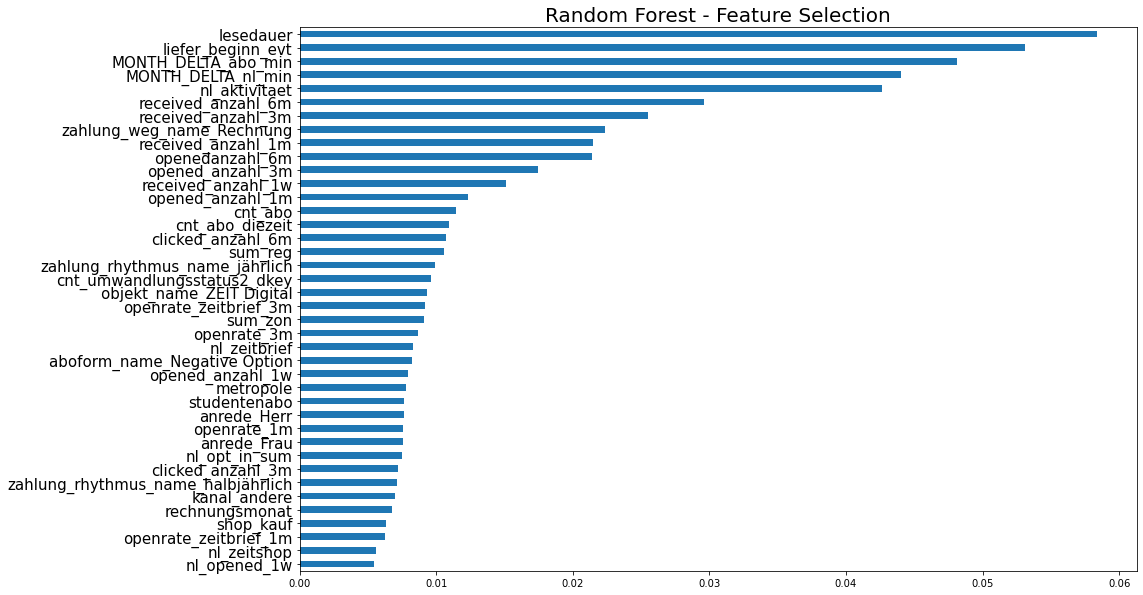

In [209]:
pd.Series(model.feature_importances_, index=X_RF.columns).nlargest(40).plot(kind='barh', figsize=(15,10)).invert_yaxis();

plt.yticks(size=15);
plt.title('Random Forest - Feature Selection', size=20);

## Feature Importance for Combined Features - Top 40

### Person´s Correlation

In [14]:
X_comb = pd.concat([X_cat_dum,X_num],axis=1)

In [15]:
X_comb.shape

(184660, 307)

In [18]:
X_comb_scaled = X_comb

In [19]:
X_comb_scaled.head(5)

,kanal_B2B,kanal_E-Mailing,kanal_Eigenwerbung,kanal_Fremdwerbung,kanal_Mailings,kanal_SEA,kanal_Standwerbung,kanal_Telefonmarketing,kanal_andere,objekt_name_DIE ZEIT - CHRIST & WELT,...,nl_clicked_1w,nl_clicked_1m,nl_clicked_3m,nl_clicked_6m,nl_unsubscribed_1w,nl_unsubscribed_1m,nl_unsubscribed_3m,nl_unsubscribed_6m,MONTH_DELTA_abo_min,MONTH_DELTA_nl_min
0,0,0,0,0,0,0,0,0,1,0,...,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.880126,0.877177
1,0,0,0,0,0,0,0,0,1,0,...,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.880126,0.877177
2,0,0,0,0,0,0,0,0,1,0,...,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.880126,0.877177
3,0,0,0,0,0,0,0,0,1,0,...,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.953055,0.943790
4,0,0,0,0,0,0,0,0,1,0,...,0.00,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.942313


In [134]:
num_feats=40

In [154]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_comb_scaled, y,num_feats)
print(str(len(cor_feature)), 'selected features')

40 selected features


### Chi Squared

In [155]:
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_comb_scaled, y)
chi_support = chi_selector.get_support()
chi_feature = X_comb_scaled.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

40 selected features


### Recursive

In [156]:
rfe_selector = RFE(estimator=LogisticRegression(n_jobs=-1), n_features_to_select=num_feats, step=0.1, verbose=5)
rfe_selector.fit(X_comb_scaled, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X_comb_scaled.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 307 features.
Fitting estimator with 277 features.
Fitting estimator with 247 features.
Fitting estimator with 217 features.
Fitting estimator with 187 features.
Fitting estimator with 157 features.
Fitting estimator with 127 features.
Fitting estimator with 97 features.
Fitting estimator with 67 features.
40 selected features


### Model selected

#### LogisticRegression

In [157]:
embeded_lr_selector = SelectFromModel(LogisticRegression(n_jobs=-1), max_features=num_feats)
embeded_lr_selector.fit(X_comb_scaled, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_comb_scaled.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

40 selected features


#### RandomForest

In [158]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,n_jobs=-1), max_features=num_feats)
embeded_rf_selector.fit(X_comb_scaled, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_comb_scaled.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

40 selected features


### Conclusion

In [159]:
feature_name = X_comb.columns.tolist()
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 
                                     'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                     'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [160]:
feature_selection_df[0:40]

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,zahlung_weg_name_Rechnung,True,True,True,True,True,5
2,nl_aktivitaet,True,True,True,True,True,5
3,liefer_beginn_evt,True,True,True,True,True,5
4,lesedauer,True,True,True,True,True,5
5,zahlung_rhythmus_name_jährlich,True,True,False,True,True,4
6,received_anzahl_6m,True,False,True,True,True,4
7,received_anzahl_1w,True,False,True,True,True,4
8,openedanzahl_6m,True,False,True,True,True,4
9,opened_anzahl_3m,True,False,True,True,True,4
10,opened_anzahl_1w,True,False,True,True,True,4


### Reducing correlated features from the set

In [161]:
important_features_combined_scale = feature_selection_df[feature_selection_df['Total'] >= 3].Feature.to_list()

In [162]:
important_features_combined_scale

['zahlung_weg_name_Rechnung',
 'nl_aktivitaet',
 'liefer_beginn_evt',
 'lesedauer',
 'zahlung_rhythmus_name_jährlich',
 'received_anzahl_6m',
 'received_anzahl_1w',
 'openedanzahl_6m',
 'opened_anzahl_3m',
 'opened_anzahl_1w',
 'objekt_name_DIE ZEIT - CHRIST & WELT',
 'clicked_anzahl_6m',
 'clicked_anzahl_3m',
 'zahlung_rhythmus_name_halbjährlich',
 'studentenabo',
 'rechnungsmonat',
 'received_anzahl_bestandskunden_6m',
 'received_anzahl_bestandskunden_3m',
 'openrate_zeitbrief_3m',
 'openrate_zeitbrief_1m',
 'objekt_name_ZEIT Digital',
 'nl_zeitshop',
 'nl_opt_in_sum',
 'land_iso_code_DE',
 'cnt_umwandlungsstatus2_dkey',
 'anrede_Herr',
 'anrede_Frau',
 'aboform_name_Negative Option',
 'MONTH_DELTA_nl_min',
 'MONTH_DELTA_abo_min']

<AxesSubplot:>

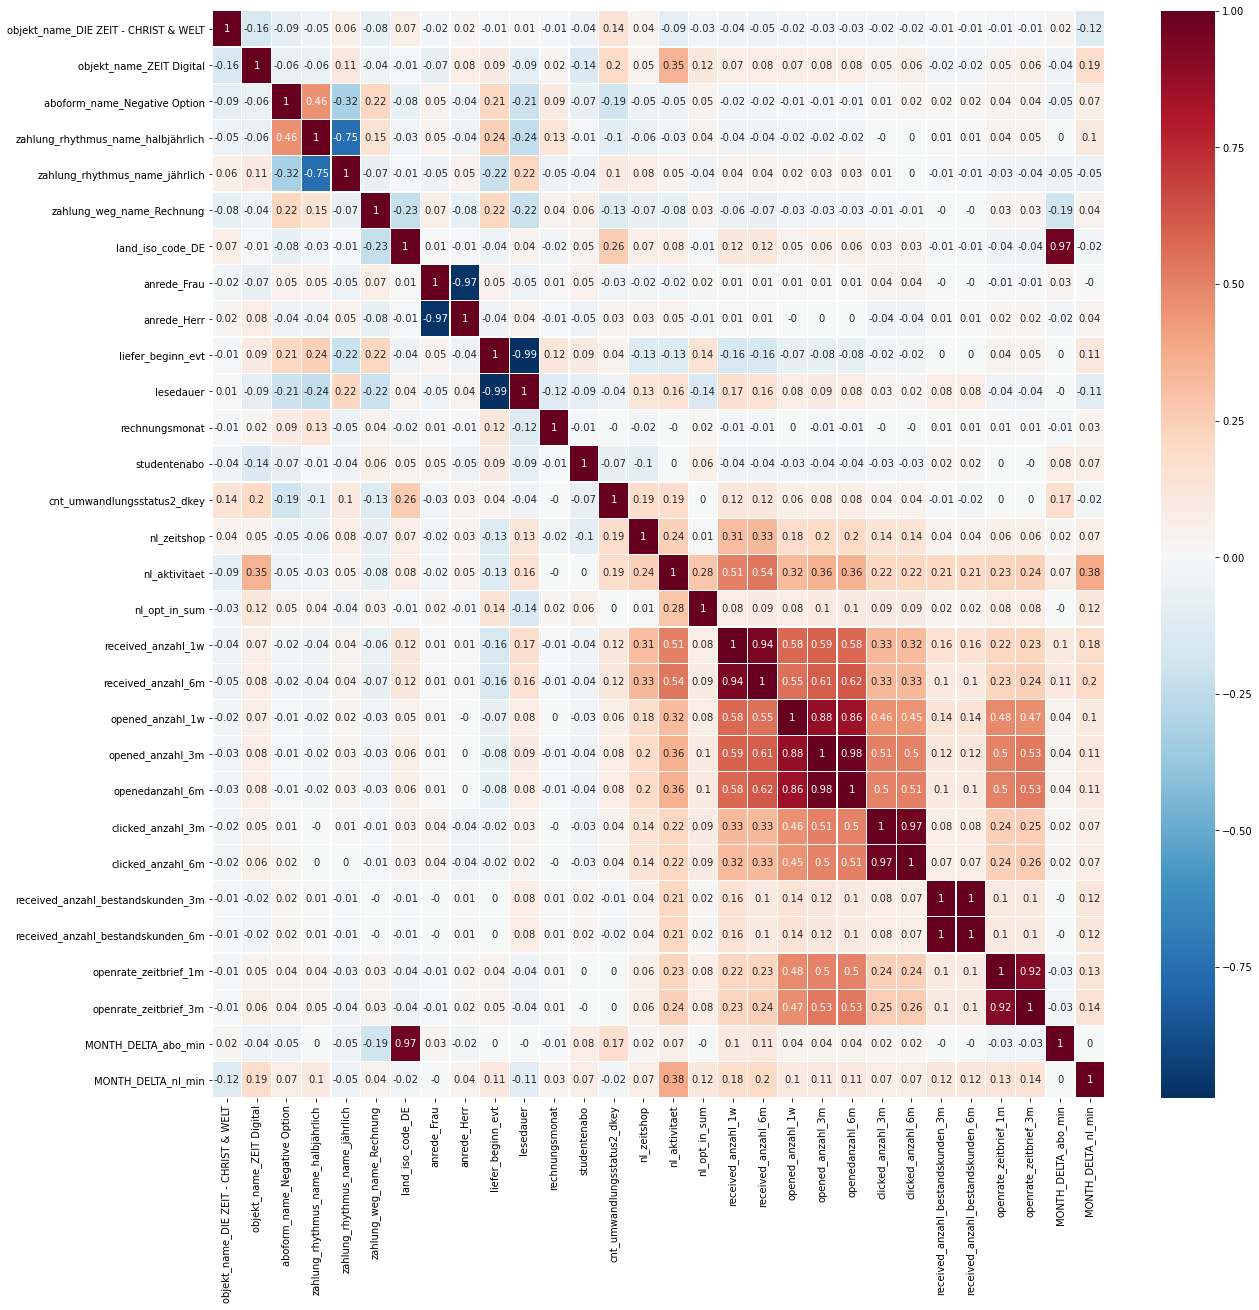

In [172]:
correlogram_combined_features = X_comb[X_comb.columns.intersection(important_features_combined_scale)]
plt.figure(figsize=(20,20))
sns.heatmap(data=correlogram_combined_features.corr().round(2),
           annot=True,
           cmap='RdBu_r',
           linewidths=0.2,
           square=False)

In [178]:
removelist1 = ['lesedauer','anrede_Herr','received_anzahl_1w','received_anzahl_1w','opened_anzahl_3m','opened_anzahl_1w','clicked_anzahl_3m','openrate_zeitbrief_1m','land_iso_code_DE','zahlung_rhythmus_name_jährlich']

important_features2 = [i for i in important_features_combined_scale if i not in removelist1]
important_features2

['zahlung_weg_name_Rechnung',
 'nl_aktivitaet',
 'liefer_beginn_evt',
 'received_anzahl_6m',
 'openedanzahl_6m',
 'objekt_name_DIE ZEIT - CHRIST & WELT',
 'clicked_anzahl_6m',
 'zahlung_rhythmus_name_halbjährlich',
 'studentenabo',
 'rechnungsmonat',
 'received_anzahl_bestandskunden_6m',
 'received_anzahl_bestandskunden_3m',
 'openrate_zeitbrief_3m',
 'objekt_name_ZEIT Digital',
 'nl_zeitshop',
 'nl_opt_in_sum',
 'cnt_umwandlungsstatus2_dkey',
 'anrede_Frau',
 'aboform_name_Negative Option',
 'MONTH_DELTA_nl_min',
 'MONTH_DELTA_abo_min']

<AxesSubplot:>

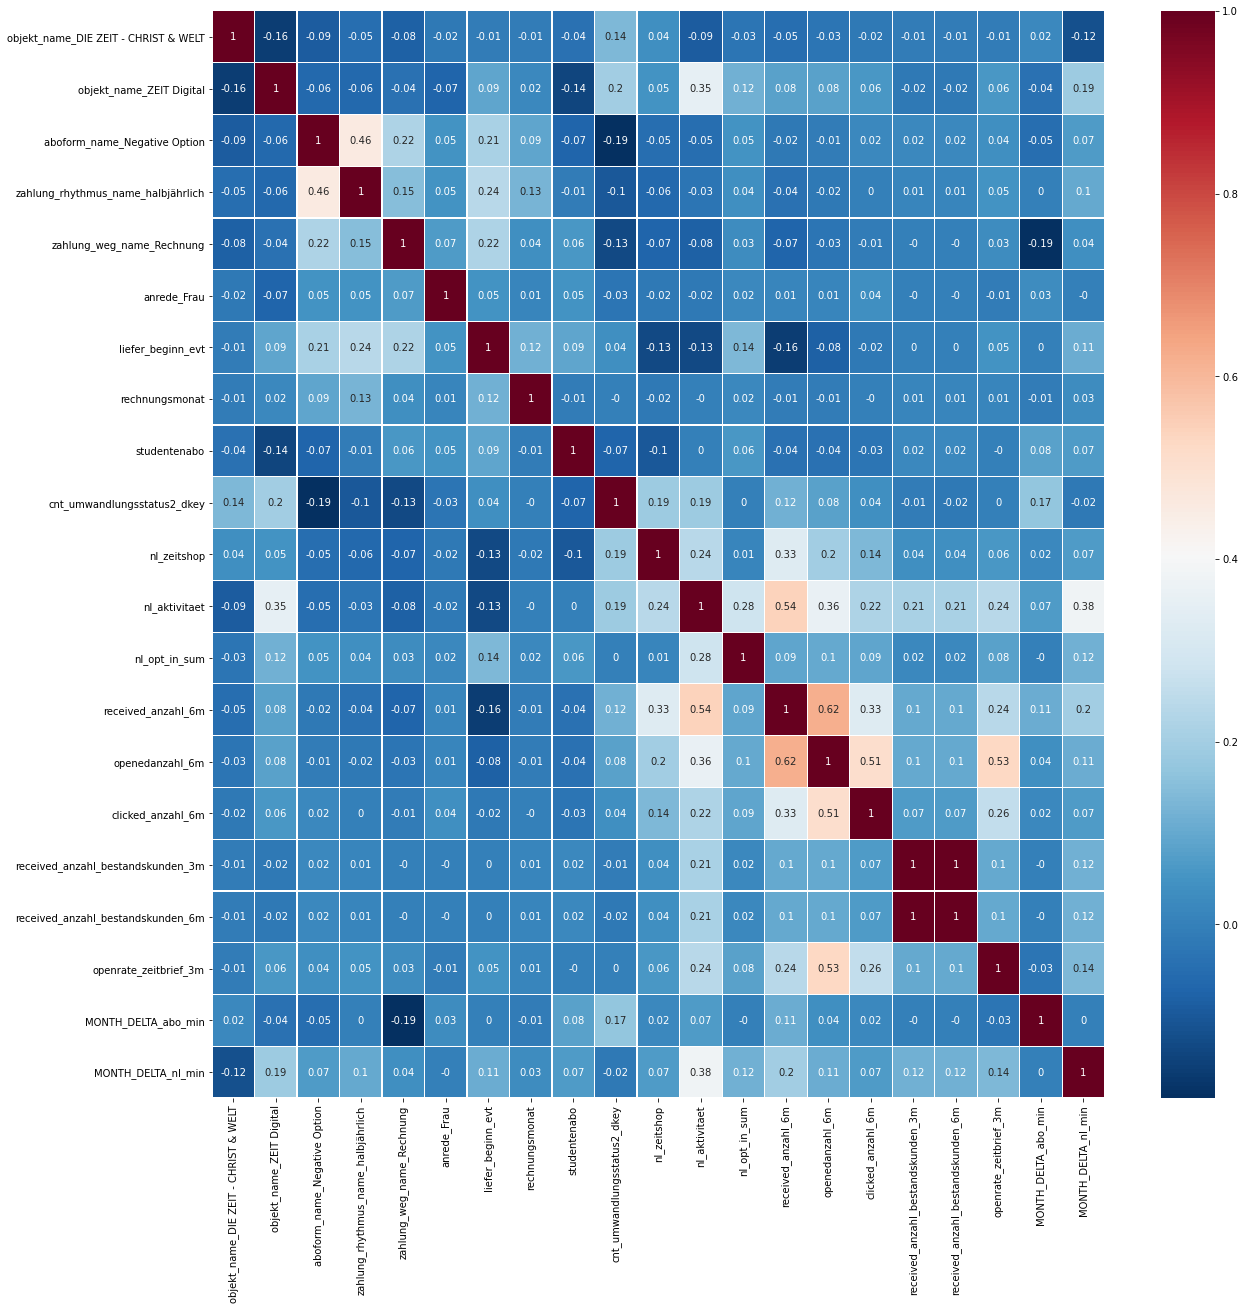

In [179]:
correlogram_combined_features = X_comb[X_comb.columns.intersection(important_features2)]
plt.figure(figsize=(20,20))
sns.heatmap(data=correlogram_combined_features.corr().round(2),
           annot=True,
           cmap='RdBu_r',
           linewidths=0.2,
           square=False)

### Final Feature Selection List (Top40)

In [180]:
important_features2

['zahlung_weg_name_Rechnung',
 'nl_aktivitaet',
 'liefer_beginn_evt',
 'received_anzahl_6m',
 'openedanzahl_6m',
 'objekt_name_DIE ZEIT - CHRIST & WELT',
 'clicked_anzahl_6m',
 'zahlung_rhythmus_name_halbjährlich',
 'studentenabo',
 'rechnungsmonat',
 'received_anzahl_bestandskunden_6m',
 'received_anzahl_bestandskunden_3m',
 'openrate_zeitbrief_3m',
 'objekt_name_ZEIT Digital',
 'nl_zeitshop',
 'nl_opt_in_sum',
 'cnt_umwandlungsstatus2_dkey',
 'anrede_Frau',
 'aboform_name_Negative Option',
 'MONTH_DELTA_nl_min',
 'MONTH_DELTA_abo_min']

['zahlung_weg_name_Rechnung',
 'nl_aktivitaet',
 'liefer_beginn_evt',
 'received_anzahl_6m',
 'openedanzahl_6m',
 'objekt_name_DIE ZEIT - CHRIST & WELT',
 'clicked_anzahl_6m',
 'zahlung_rhythmus_name_halbjährlich',
 'studentenabo',
 'rechnungsmonat',
 'received_anzahl_bestandskunden_6m',
 'received_anzahl_bestandskunden_3m',
 'openrate_zeitbrief_3m',
 'objekt_name_ZEIT Digital',
 'nl_zeitshop',
 'nl_opt_in_sum',
 'cnt_umwandlungsstatus2_dkey',
 'anrede_Frau',
 'aboform_name_Negative Option',
 'MONTH_DELTA_nl_min',
 'MONTH_DELTA_abo_min']

-> **21 Top Features**

This feature list was used in an earlier project stage and was later replaced by the Top100 feature selection of the next section (1.4). It is given for reference here. 

## Feature Importance for Combined Features - Top 100

### Person´s Correlation

In [216]:
num_feats=100

In [217]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_comb_scaled, y,num_feats)
print(str(len(cor_feature)), 'selected features')

100 selected features


### Chi Squared

In [219]:
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_comb_scaled, y)
chi_support = chi_selector.get_support()
chi_feature = X_comb_scaled.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


### Recursive

In [220]:
rfe_selector = RFE(estimator=LogisticRegression(n_jobs=-1), n_features_to_select=num_feats, step=0.1, verbose=5)
rfe_selector.fit(X_comb_scaled, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X_comb_scaled.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 307 features.
Fitting estimator with 277 features.
Fitting estimator with 247 features.
Fitting estimator with 217 features.
Fitting estimator with 187 features.
Fitting estimator with 157 features.
Fitting estimator with 127 features.
100 selected features


### Model selected

#### LogisticRegression

In [221]:
embeded_lr_selector = SelectFromModel(LogisticRegression(n_jobs=-1), max_features=num_feats)
embeded_lr_selector.fit(X_comb_scaled, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_comb_scaled.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

77 selected features


#### RandomForest

In [222]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,n_jobs=-1), max_features=num_feats)
embeded_rf_selector.fit(X_comb_scaled, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_comb_scaled.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

69 selected features


### Conclusion

In [223]:
feature_name = X_comb.columns.tolist()
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 
                                     'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                     'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [227]:
feature_selection_df.head(50)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,zahlung_weg_name_Rechnung,True,True,True,True,True,5
2,zahlung_rhythmus_name_jährlich,True,True,True,True,True,5
3,zahlung_rhythmus_name_halbjährlich,True,True,True,True,True,5
4,rechnungsmonat,True,True,True,True,True,5
5,received_anzahl_6m,True,True,True,True,True,5
6,received_anzahl_3m,True,True,True,True,True,5
7,received_anzahl_1w,True,True,True,True,True,5
8,received_anzahl_1m,True,True,True,True,True,5
9,openedanzahl_6m,True,True,True,True,True,5
10,opened_anzahl_3m,True,True,True,True,True,5


### Reducing correlated features from the set

In [228]:
important_features_combined_scale = feature_selection_df[feature_selection_df['Total'] >= 3].Feature.to_list()

In [230]:
len(important_features_combined_scale)

73

In [236]:
important_features_combined_scale[0:20]

['zahlung_weg_name_Rechnung',
 'zahlung_rhythmus_name_jährlich',
 'zahlung_rhythmus_name_halbjährlich',
 'rechnungsmonat',
 'received_anzahl_6m',
 'received_anzahl_3m',
 'received_anzahl_1w',
 'received_anzahl_1m',
 'openedanzahl_6m',
 'opened_anzahl_3m',
 'objekt_name_ZEIT Digital',
 'nl_zeitbrief',
 'nl_aktivitaet',
 'liefer_beginn_evt',
 'lesedauer',
 'cnt_umwandlungsstatus2_dkey',
 'clickrate_3m',
 'anrede_Herr',
 'anrede_Frau',
 'aboform_name_Geschenkabo']

<AxesSubplot:>

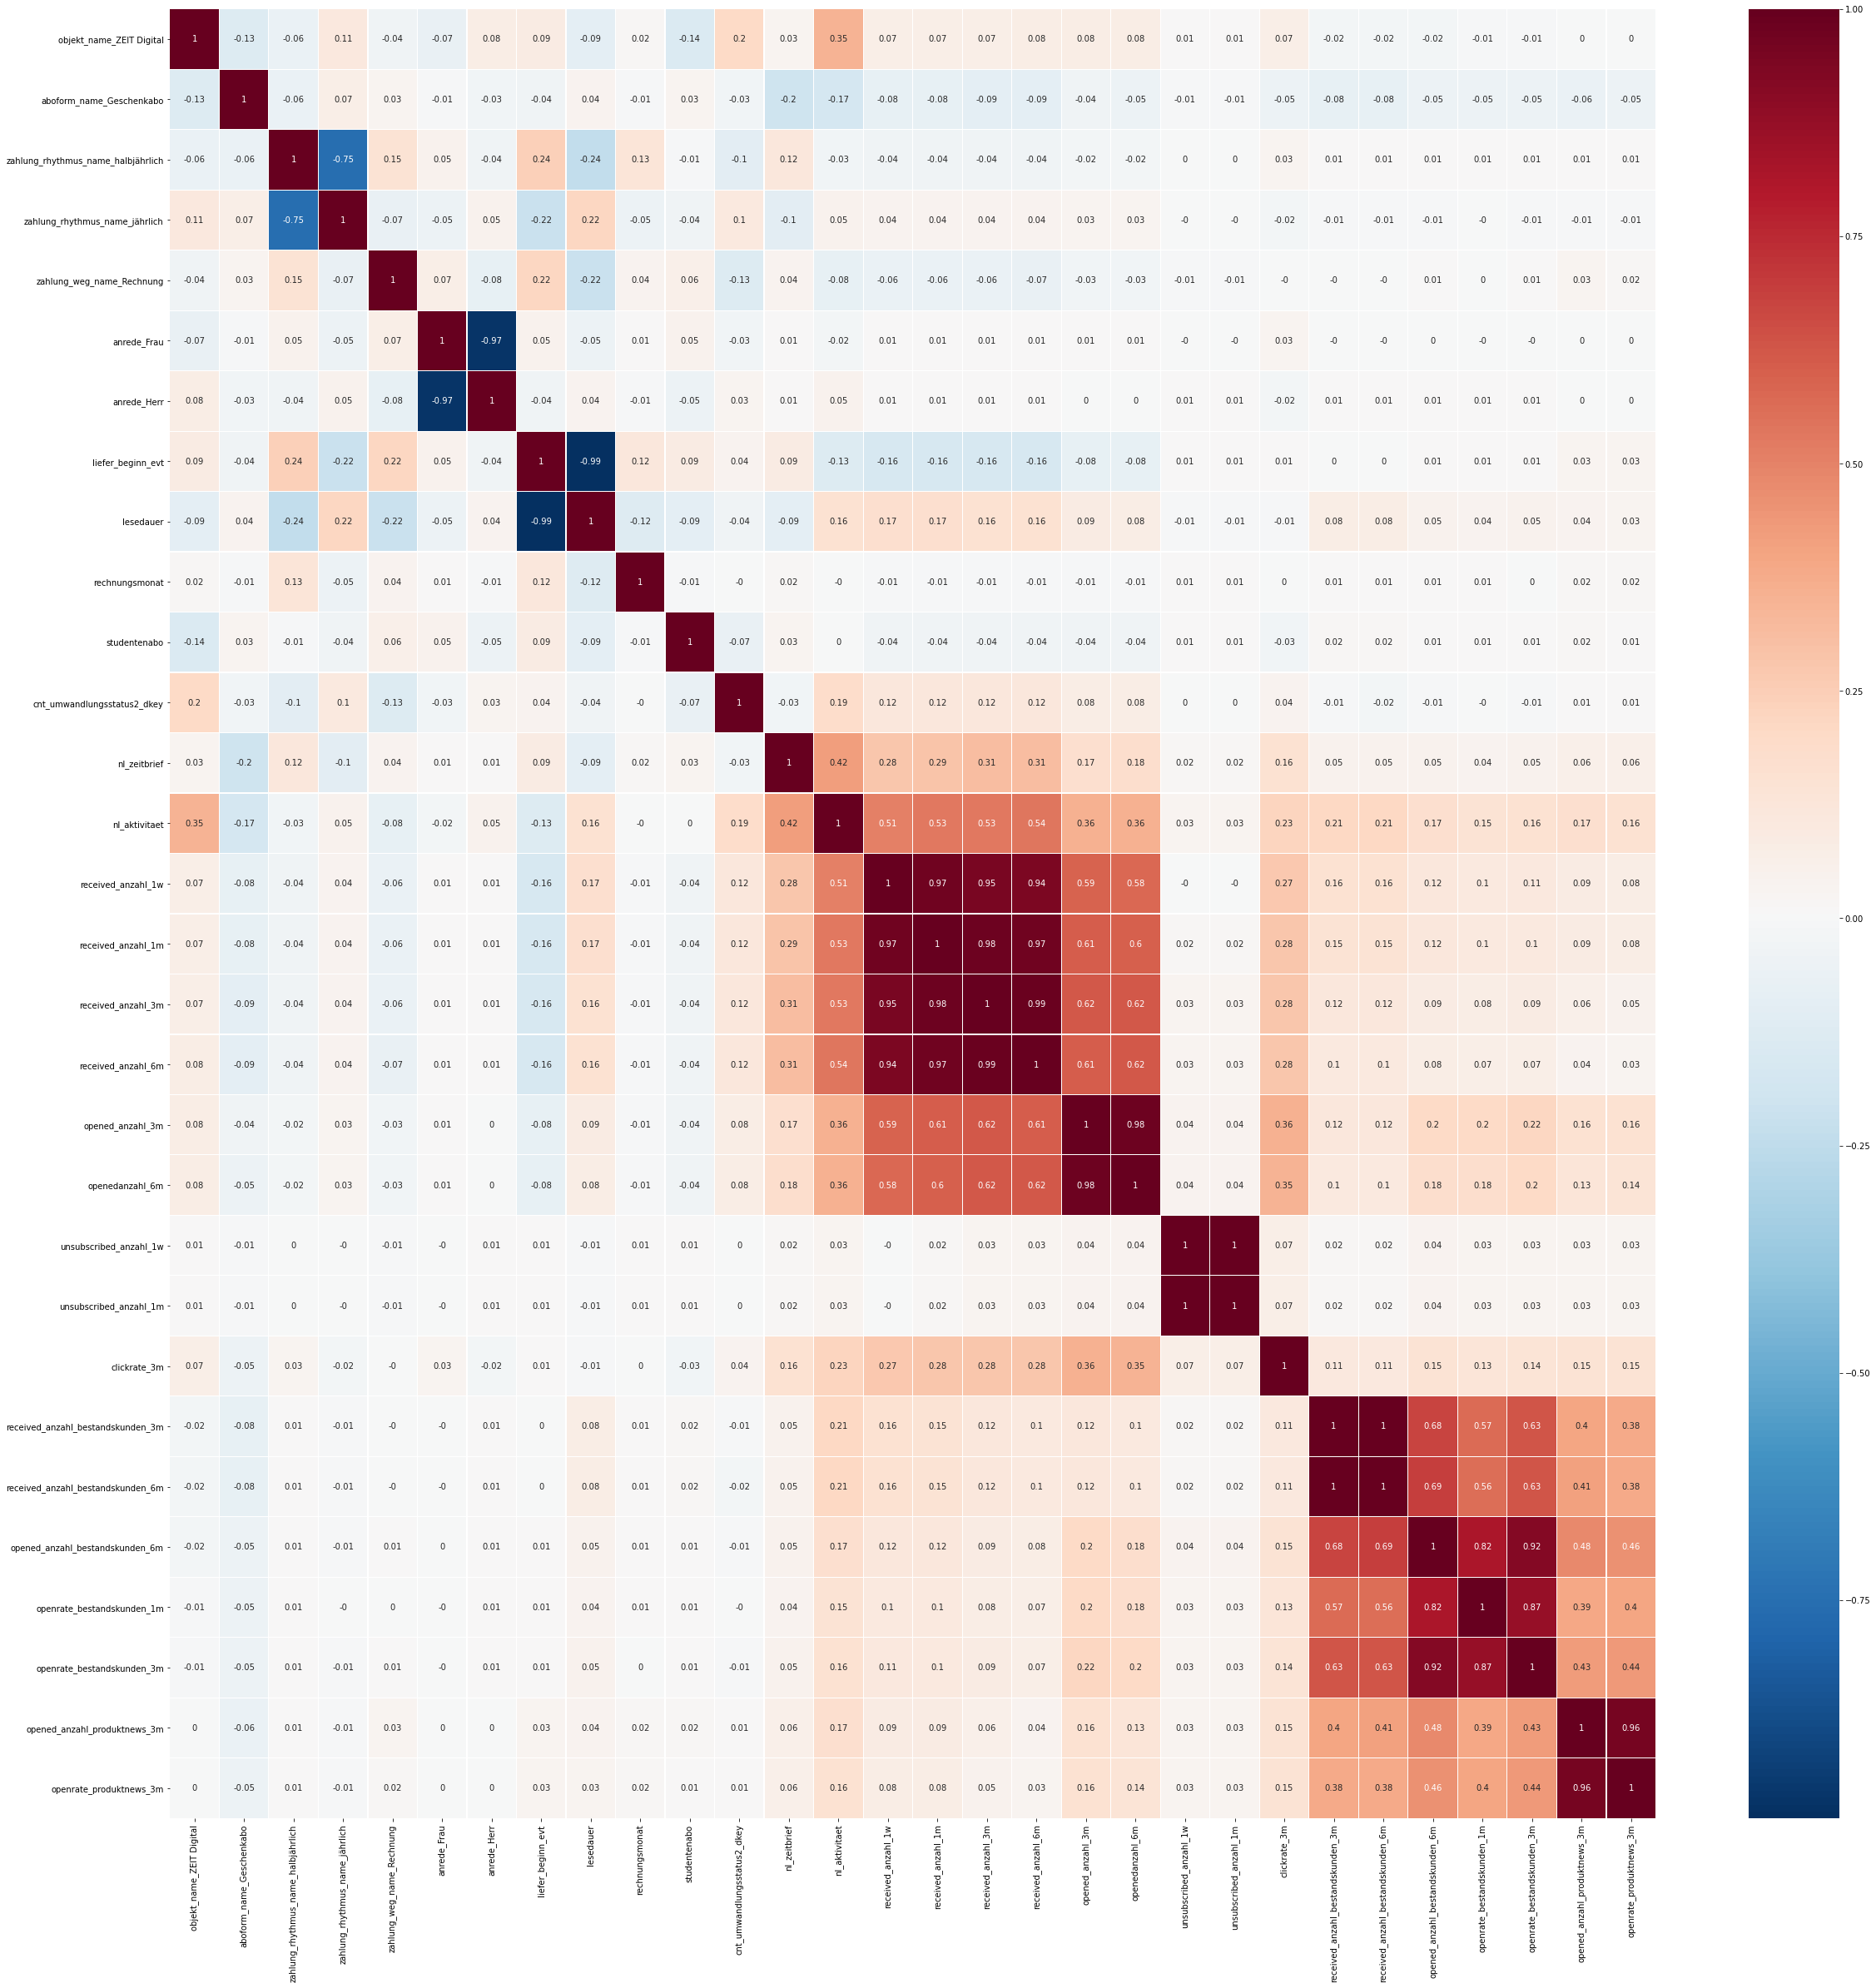

In [237]:
correlogram_combined_features_1 = X_comb[X_comb.columns.intersection(important_features_combined_scale[0:30])]
plt.figure(figsize=(40,40))
sns.heatmap(data=correlogram_combined_features_1.corr().round(2),
           annot=True,
           cmap='RdBu_r',
           linewidths=0.2,
           square=False)

In [238]:
removelist1 = ['lesedauer','anrede_Herr','received_anzahl_1w','received_anzahl_1w','opened_anzahl_3m','opened_anzahl_1w','clicked_anzahl_3m','openrate_zeitbrief_1m','land_iso_code_DE','zahlung_rhythmus_name_jährlich']

important_features2 = [i for i in important_features_combined_scale if i not in removelist1]
len(important_features2)

64

<AxesSubplot:>

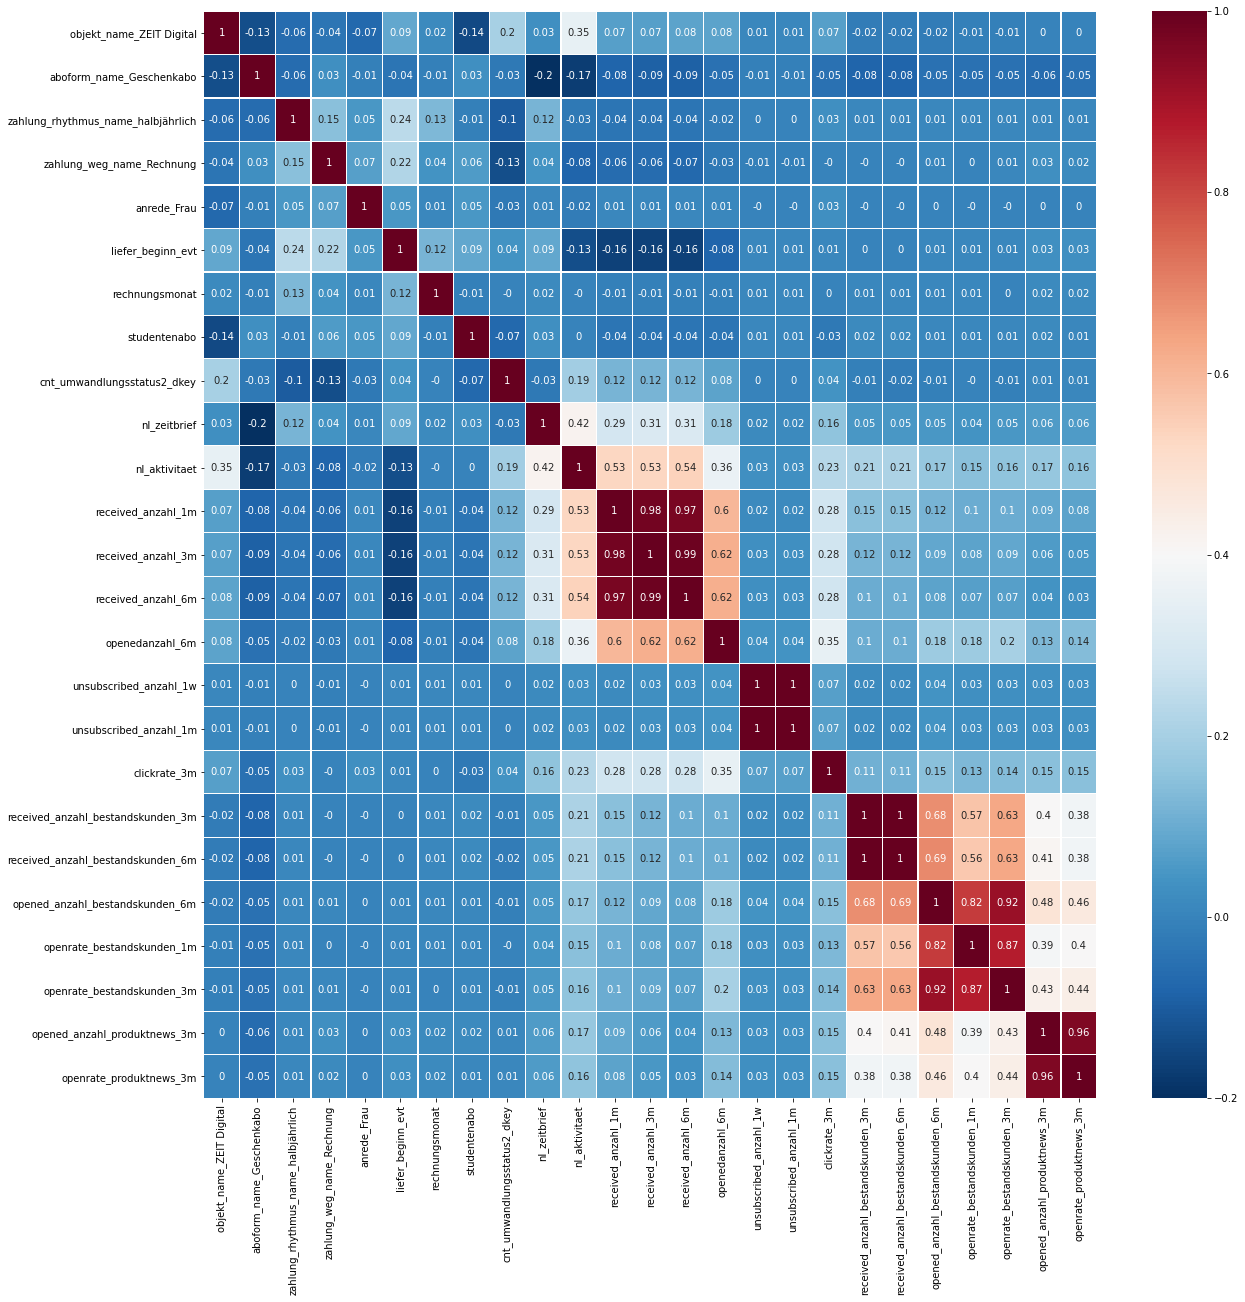

In [240]:
correlogram_combined_features_2 = X_comb[X_comb.columns.intersection(important_features2[0:25])]
plt.figure(figsize=(20,20))
sns.heatmap(data=correlogram_combined_features_2.corr().round(2),
           annot=True,
           cmap='RdBu_r',
           linewidths=0.2,
           square=False)

In [242]:
removelist2 = ['unsubscribed_anzahl_1w','received_anzahl_1m','received_anzahl_3m','openrate_bestandskunden_1m','openrate_bestandskunden_3m']

important_features3 = [i for i in important_features2 if i not in removelist2]
len(important_features3)

59

<AxesSubplot:>

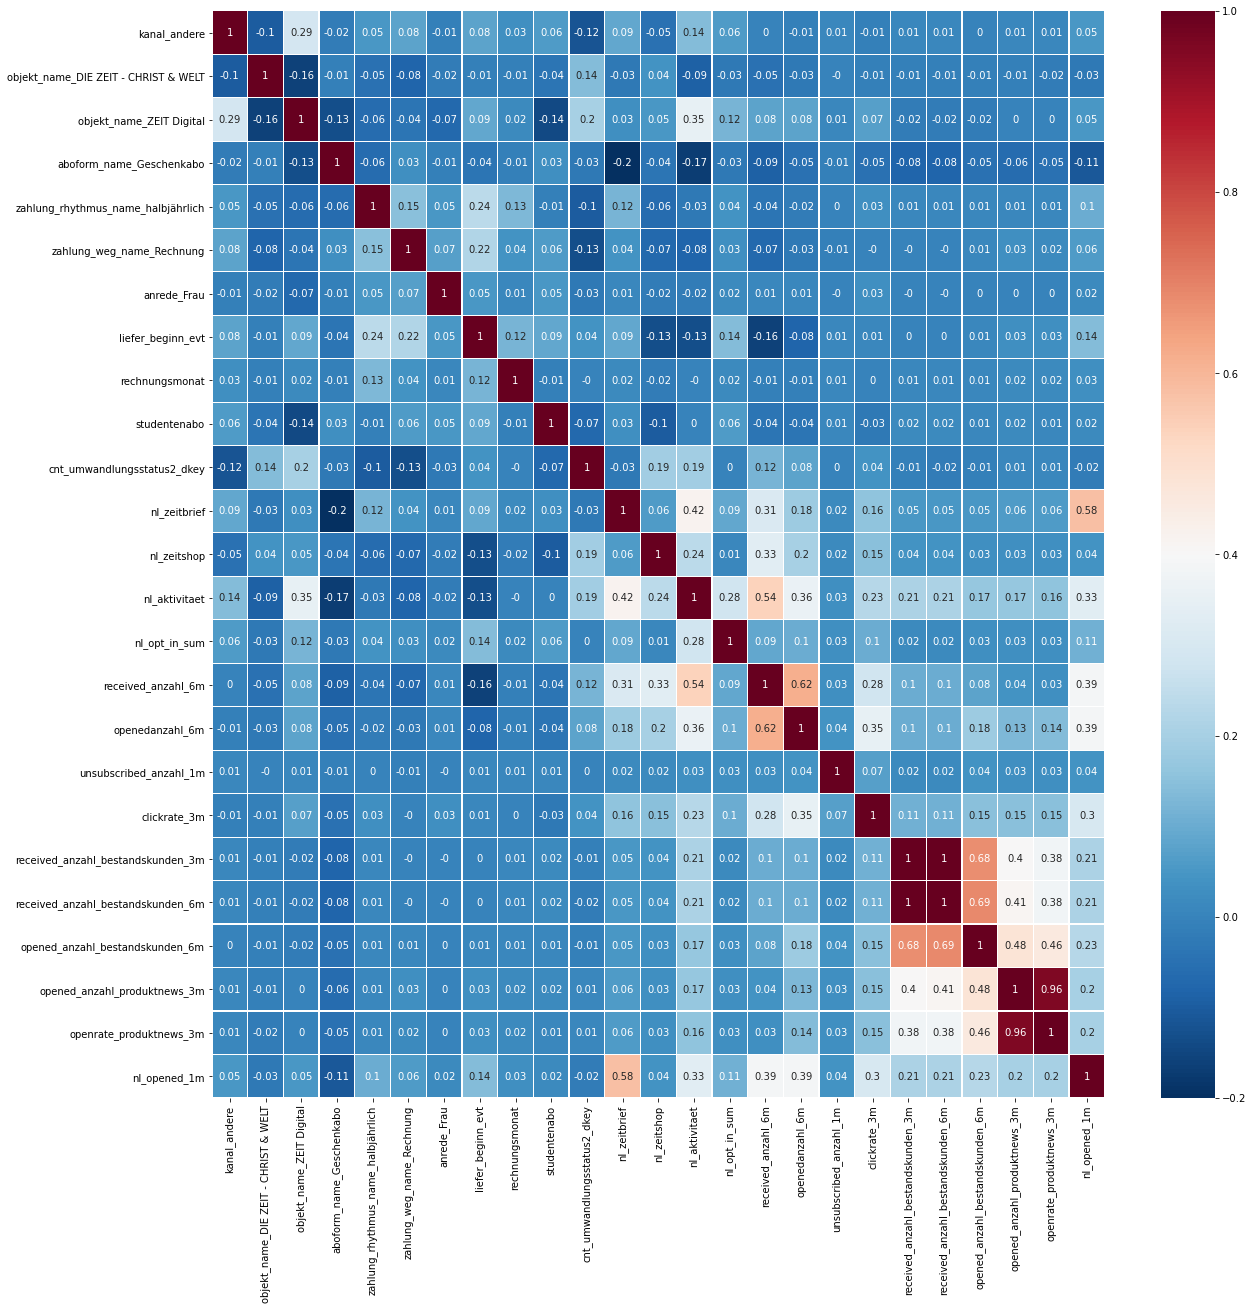

In [243]:
correlogram_combined_features_3 = X_comb[X_comb.columns.intersection(important_features3[0:25])]
plt.figure(figsize=(20,20))
sns.heatmap(data=correlogram_combined_features_3.corr().round(2),
           annot=True,
           cmap='RdBu_r',
           linewidths=0.2,
           square=False)

In [252]:
removelist3 = ['opened_anzahl_produktnews_3m','received_anzahl_bestandskunden_3m','cnt_abo_diezeit','clicked_anzahl_1m','unsubscribed_anzahl_3m','unsubscribed_anzahl_hamburg_1w','sso_reg','opened_anzahl_1m']

important_features4 = [i for i in important_features3 if i not in removelist3]
len(important_features4)

51

<AxesSubplot:>

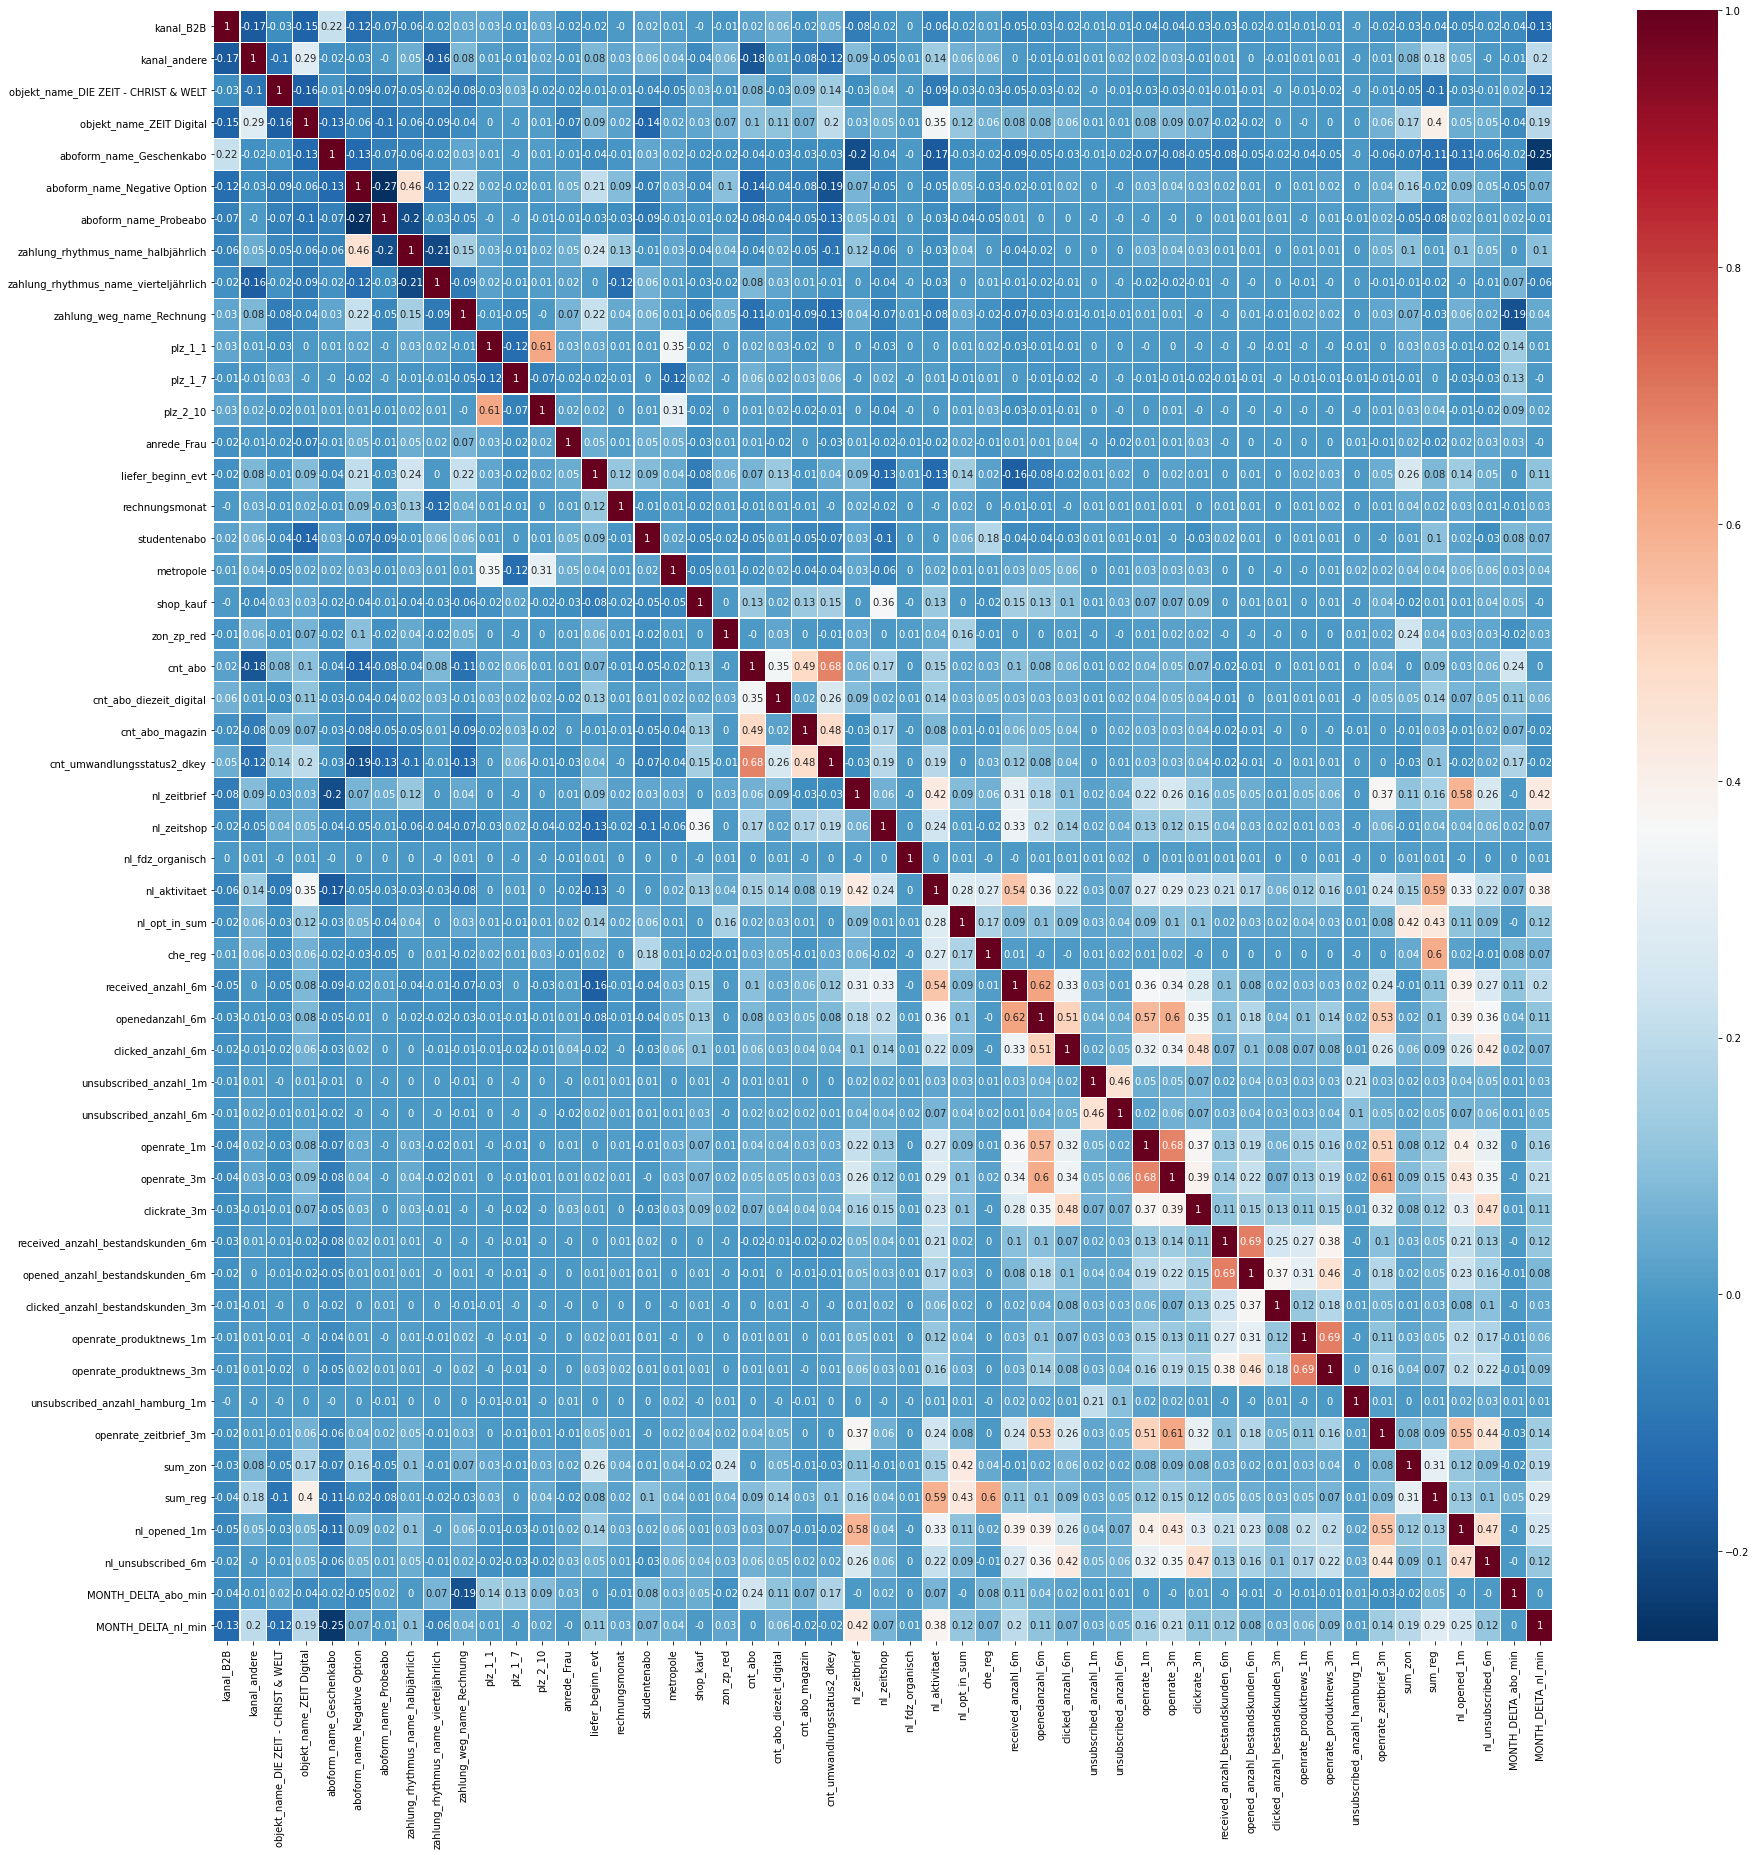

In [254]:
correlogram_combined_features_4 = X_comb[X_comb.columns.intersection(important_features4)]
plt.figure(figsize=(30,30))
sns.heatmap(data=correlogram_combined_features_4.corr().round(2),
           annot=True,
           cmap='RdBu_r',
           linewidths=0.2,
           square=False)

### Final Feature Selection List:

In [255]:
important_features4

['zahlung_weg_name_Rechnung',
 'zahlung_rhythmus_name_halbjährlich',
 'rechnungsmonat',
 'received_anzahl_6m',
 'openedanzahl_6m',
 'objekt_name_ZEIT Digital',
 'nl_zeitbrief',
 'nl_aktivitaet',
 'liefer_beginn_evt',
 'cnt_umwandlungsstatus2_dkey',
 'clickrate_3m',
 'anrede_Frau',
 'aboform_name_Geschenkabo',
 'unsubscribed_anzahl_1m',
 'studentenabo',
 'received_anzahl_bestandskunden_6m',
 'openrate_produktnews_3m',
 'opened_anzahl_bestandskunden_6m',
 'objekt_name_DIE ZEIT - CHRIST & WELT',
 'nl_zeitshop',
 'nl_opt_in_sum',
 'nl_opened_1m',
 'kanal_andere',
 'kanal_B2B',
 'clicked_anzahl_6m',
 'che_reg',
 'MONTH_DELTA_nl_min',
 'zon_zp_red',
 'zahlung_rhythmus_name_vierteljährlich',
 'unsubscribed_anzahl_hamburg_1m',
 'unsubscribed_anzahl_6m',
 'sum_zon',
 'sum_reg',
 'shop_kauf',
 'plz_2_10',
 'plz_1_7',
 'plz_1_1',
 'openrate_zeitbrief_3m',
 'openrate_produktnews_1m',
 'openrate_3m',
 'openrate_1m',
 'nl_unsubscribed_6m',
 'nl_fdz_organisch',
 'metropole',
 'cnt_abo_magazin',
 'cnt

51 top features have been selected based on a different features selection methods.

## Summary of the 51 selected features

A short summary of the selected features is given here:
    
- As you can see the payment features and categorical information about the subscriptions are classified as important. The features **'zahlung_weg_name_Rechnung', 'zahlung_weg_name_Rechnung',  'zahlung_rhythmus_name_halbjährlich', 'rechnungsmonat' and 'zahlung_rhythmus_name_vierteljährlich'** are all linked to the payment requirements. 

- We can find a few features about the kind of subscription like **'studentenabo', 'aboform_name_Geschenkabo', 'liefer_beginn_evt', 'objekt_name_ZEIT Digital', 'aboform_name_Probeabo', 'aboform_name_Negative Option', 'cnt_umwandlungsstatus2_dkey'** (which is given if a subscription was changed from test, or student to fully paid) and how the subscription has occurred (**'kanal_andere', 'kanal_B2B'**). 

- Also as we said in the EDA, there are indications that  **'objekt_name_DIE ZEIT - CHRIST & WELT'** subscriptions are more likely not to churn. 

- Even the geographical features with a lot of different values and distributions like plz (**'plz_2_10', 'plz_1_7', 'plz_1_1'**) are ranked as important. If you remember the maps from the EDA even this was expected. 

- If you keep in mind that most of the features were more or less activity and newsletter features it is not surprising that many of these are in the top 51 feature list: **'received_anzahl_6m', 'openedanzahl_6m', 'clickrate_3m', 'nl_zeitbrief', 'nl_aktivitaet', 'unsubscribed_anzahl_1m', 'received_anzahl_bestandskunden_6m', 'openrate_produktnews_3m', 'opened_anzahl_bestandskunden_6m', 'nl_zeitshop',  'unsubscribed_anzahl_hamburg_1m', 'unsubscribed_anzahl_6m', 'nl_opt_in_sum', 'nl_opened_1m', 'clicked_anzahl_6m', 'openrate_zeitbrief_3m', 'shop_kauf', 'openrate_produktnews_1m', 'openrate_3m', 'openrate_1m', 'nl_unsubscribed_6m', 'clicked_anzahl_bestandskunden_3m' and 'nl_fdz_organisch'**. 

- Also the engineered features and even some of these which they were engineered from are listed: **'MONTH_DELTA_abo_min', 'MONTH_DELTA_nl_min', 'sum_zon' and 'sum_reg'**, in which the original features 'zon_zp_red' and 'che_reg' are summed. 
    
- The count features of the number of different subscriptions per household is also included: **'cnt_abo_magazin', 'cnt_abo_diezeit_digital', 'cnt_abo'**, 
    
- Fianlly the gender and metropololitan features complete the list (**'anrede_Frau', 'metropole'**).


# Machine Learning Methods

In this section the different machine learning methods and its optimization is presented.

To keep this notebook manageable we decided to document the single models and the optimization in an extra folder on our github repository [ml-modelle](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/tree/main/ml-modelle).

In this folder you can find the five different models which have been trained and fit on the 51 most important features:

- Logistic Regression [notebook Logistic Regression](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/blob/main/ml-modelle/LogReg_Tuning.ipynb)

- Random Forest [notebook RandomForest](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/blob/main/ml-modelle/RandomForest_Tuning.ipynb)

- XGBoost [notebook XGBoost](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/blob/main/ml-modelle/XGBoost_Tuning.ipynb)

- SVC [notebook SVC](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/blob/main/ml-modelle/SVM_Tuning.ipynb)

- KNN [notebook KNN](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/blob/main/ml-modelle/KNN_Tuning.ipynb)


The Logistic Regression and Random Forest models showed the best results when we created the baseline model, which can be found in the following notebook: [Baseline Models](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/blob/main/Baseline_Model.ipynb).  

The LogisticRegression is actually the model currently used by die Zeit Verlag for their predictions. After optimizing on the selected hyperparameters and discussing the results, we decided to try a combination of more than one model in a stacking and voting classification (see Chapter 3 in this notebook). 

The Random Forest, XGBoost and Logistic Regression models were optimized with focus on the recall score.

Furthermore we thought it would be useful to further optimize the models by focusing on another score (precision). So we trained three models (SVC, KNN and another Random Forest) on precision. 

The idea is, that if we achieved a recall of 78% (identifying the actually churning customers), we could further optimize our models to avoid a large number of false-positives. A stakeholder interests for churn predition might be to ensure that loyal subscribers are not annoyed by unnecessary churn prevention actions such as emails. Therefore a high number of loyal subscribers (false-positives) might get disturbed, if the precision score is low. 

So we trained a model using SVC, another Random Forest and one KNN on precision. We saw that the SVC is not able to handle the large amount of data, which we already suspected before but still trained it to get results. 

The results of the Base models ans the optimized models are summed up in the following table. All scores are the score on the test dataset for churn = 1. 

<table>
  <tr>
   <td colspan="2" >
   </td>
   <td colspan="3" ><strong>Base (whole dataset)</strong>
   </td>
   <td colspan="3" ><strong>Optimized**</strong>
   </td>
  </tr>
  <tr>
   <td><strong>Model</strong>
   </td>
   <td><strong>Target Score</strong>
   </td>
   <td><strong>Recall</strong>
   </td>
   <td><strong>Precision</strong>
   </td>
   <td><strong>F1</strong>
   </td>
   <td><strong>Recall</strong>
   </td>
   <td><strong>Precision</strong>
   </td>
   <td><strong>F1</strong>
   </td>
  </tr>
  <tr>
   <td>Logistic Regression
   </td>
   <td>Recall
   </td>
   <td>0.48
   </td>
   <td>0.74
   </td>
   <td>0.58
   </td>
   <td>0.69
   </td>
   <td>0.47
   </td>
   <td>0.56
   </td>
  </tr>
  <tr>
   <td>Random Forest
   </td>
   <td>Recall
   </td>
   <td>0.48
   </td>
   <td>0.83
   </td>
   <td>0.61
   </td>
   <td>0.77
   </td>
   <td>0.58
   </td>
   <td>0.66
   </td>
  </tr>
  <tr>
   <td>XGBoost
   </td>
   <td>Recall
   </td>
   <td>0.47
   </td>
   <td>0.72
   </td>
   <td>0.57
   </td>
   <td>0.73
   </td>
   <td>0.55
   </td>
   <td>0.63
   </td>
  </tr>
  <tr>
   <td>SVC
   </td>
   <td>Precision
   </td>
   <td>0.01
   </td>
   <td>0.93
   </td>
   <td>0.02
   </td>
   <td>0.13
   </td>
   <td>0.60
   </td>
   <td>0.22
   </td>
  </tr>
  <tr>
   <td>KNN
   </td>
   <td>Precision
   </td>
   <td>0.58
   </td>
   <td>0.46
   </td>
   <td>0.51
   </td>
   <td>0.77
   </td>
   <td>0.52
   </td>
   <td>0.62
   </td>
  </tr>
  <tr>
   <td>Random Forest
   </td>
   <td>Precision
   </td>
   <td>0.48
   </td>
   <td>0.83
   </td>
   <td>0.61
   </td>
   <td>0.77
   </td>
   <td>0.61
   </td>
   <td>0.68
   </td>
  </tr>
</table>


** all features, see [Baseline Models](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/blob/main/Baseline_Model.ipynb)

** 51 important features (see Chapter 2 in this notebook)

# Stacking Classifier & Voting Classifier

Based on the findings of chapter 2 (Machine Learning Methods) two different stacking classifier are used. One StackingCVC (cross validation stacking classfier) and one Voting Classifier (majority vote) are developed. In these classifiers, the optimized machine learning methods are combined to give an even better churn prediction than the single classifier. 

Stacking: 

Stacking is a technique that takes several classification models and uses the output as input for a meta-classifier. The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification task and make predictions that have better performance than the single models. A logistic Regression was chosen as meta-classifier and was trained on the predictions made by the base models: Two Random Forest (one optimized on recall and another precision), a Logistic Regression optimized on Recall and a XGBoost optimized on Recall. 

Voting: 

The Voting classifier works like an electoral system in which a prediction on a new data point is made based on a voting system of the member of a group of machine learning models. We chose two Random Forest (one optimized on recall and another precision), a KNN optimized on precision and a XGBoost optimized on Recall as the voting group. Furthermore we selected the hard voting type to predict the class labels in a majority rule voting.  

**Description of results:**


<table>
  <tr>
   <td><strong>Model</strong>
   </td>
   <td><strong>Submodels</strong>
   </td>
   <td><strong>Recall</strong>
   </td>
   <td><strong>Precision</strong>
   </td>
   <td><strong>F1</strong>
   </td>
   <td><strong>Accuracy</strong>
   </td>
  </tr>
  <tr>
   <td>Stacking Classifier (meta classifier: LogReg)
   </td>
   <td>RF_recall,LogReg_recall
<p>
    RF_precision, XGB_recall
   </td>
   <td>0.772
   </td>
   <td>0.611
   </td>
   <td>0.682
   </td>
   <td>0.782
   </td>
  </tr>
  <tr>
   <td>Voting Classifier (majority vote)
   </td>
   <td>RF_recall, KNN_precision
<p>
RF_precision, XGB_recall
   </td>
   <td>0.760
   </td>
   <td>0.620
   </td>
   <td>0.683
   </td>
   <td>0.786
   </td>
  </tr>
</table>

## Loading the top 51 features data from the dataframe and split dataset

In [3]:
# new feature dataframe
df_importance = pd.read_csv('data/df_clean_engineered_all.csv')

In [4]:
y = df_importance['churn']
df_importance = df_importance.drop(['churn','plz_3','abo_registrierung_min','nl_registrierung_min','ort'], axis = 1)

df_importance = pd.get_dummies(df_importance, columns = ['kanal', 'objekt_name', 'aboform_name', 'zahlung_rhythmus_name','zahlung_weg_name', 'plz_1', 'plz_2', 'land_iso_code', 'anrede','titel'], drop_first = True)

In [5]:
important_features_combined_dropping = ['zahlung_weg_name_Rechnung',
 'zahlung_rhythmus_name_halbjährlich',
 'rechnungsmonat',
 'received_anzahl_6m',
 'openedanzahl_6m',
 'objekt_name_ZEIT Digital',
 'nl_zeitbrief',
 'nl_aktivitaet',
 'liefer_beginn_evt',
 'cnt_umwandlungsstatus2_dkey',
 'clickrate_3m',
 'anrede_Frau',
 'aboform_name_Geschenkabo',
 'unsubscribed_anzahl_1m',
 'studentenabo',
 'received_anzahl_bestandskunden_6m',
 'openrate_produktnews_3m',
 'opened_anzahl_bestandskunden_6m',
 'objekt_name_DIE ZEIT - CHRIST & WELT',
 'nl_zeitshop',
 'nl_opt_in_sum',
 'nl_opened_1m',
 'kanal_andere',
 'kanal_B2B',
 'clicked_anzahl_6m',
 'che_reg',
 'MONTH_DELTA_nl_min',
 'zon_zp_red',
 'zahlung_rhythmus_name_vierteljährlich',
 'unsubscribed_anzahl_hamburg_1m',
 'unsubscribed_anzahl_6m',
 'sum_zon',
 'sum_reg',
 'shop_kauf',
 'plz_2_10',
 'plz_1_7',
 'plz_1_1',
 'openrate_zeitbrief_3m',
 'openrate_produktnews_1m',
 'openrate_3m',
 'openrate_1m',
 'nl_unsubscribed_6m',
 'nl_fdz_organisch',
 'metropole',
 'cnt_abo_magazin',
 'cnt_abo_diezeit_digital',
 'cnt_abo',
 'clicked_anzahl_bestandskunden_3m',
 'aboform_name_Probeabo',
 'aboform_name_Negative Option',
 'MONTH_DELTA_abo_min']

In [6]:
df_importance = df_importance[important_features_combined_dropping]

### Initial Split to keep a held out test set

In [7]:
df_importance.shape

(184660, 51)

In [8]:
X = df_importance

In [9]:
#y = df_importance_y
y = y

### Train Test Split

In [11]:
 # split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state,stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(df_importance, y, test_size=0.30, random_state=random_state,stratify=y)

print('Undersampling')
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=random_state)
X_train, y_train = undersample.fit_resample(X_train, y_train)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Undersampling


In [12]:
X_train.shape

(83970, 51)

In [13]:
X_test.shape

(46165, 51)

## StackingCVClassifier - Metaclassifier Logistic Regression

In [14]:
# recall = 0.770
classifier1 = RandomForestClassifier(n_estimators = 380, criterion = "entropy", max_depth = 35,
                                     max_features = "auto", min_samples_leaf = 1,
                                     min_samples_split = 4, n_jobs = -1, bootstrap = True, random_state = random_state)

# recall = 0.692
classifier2 = LogisticRegression(solver='liblinear',penalty='l2',C=10,n_jobs=-1)

# precision = 0.518
classifier3 = KNeighborsClassifier(n_neighbors = 30,weights='distance',p=1,metric='manhattan',n_jobs=-1)

# precision = 0.609
classifier4 = RandomForestClassifier(n_estimators = 2000, criterion = "entropy", max_depth = None,
                                     max_features = "sqrt", min_samples_leaf = 2,
                                     min_samples_split = 5, n_jobs = -1, bootstrap = False, random_state = random_state)

# recall=  0.728
classifier5 = XGBClassifier(eta = 0.2, gamma = 0, max_depth = 9, min_child_weight = 4, sampling_method='gradient_based', subsample=1,
                            tree_method = 'hist', validate_parameter = True, random_state=random_state, n_jobs=-1)

# Initializing the StackingCV classifier without the logreg classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier3, classifier4, classifier5],
                            shuffle = False,
                            use_probas = True,
                            cv = 3,
                            meta_classifier = LogisticRegression(n_jobs=-1),
                            n_jobs=-1,
                            random_state = random_state,
                            verbose=2)

# store classifiers in dictionary
classifiers = {"RF_recall": classifier1,
               "LogReg_recall": classifier2,
               "RF_precision": classifier4,
               "XGB_recall": classifier5,
               "Stack": sclf}

# train all classifiers
for key in classifiers:
    # get classifier
    classifier = classifiers[key]
    
    # fit classifier
    print('Fit classififer: ',key)
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
    
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    print('Make Predictions')
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test.values

# prediction and results
y_stack_predicted = sclf.predict(X_test)

print('Confusion Matrix Test')
print(confusion_matrix(y_test, y_stack_predicted))

print('Classification Report Test')
print(classification_report(y_test, y_stack_predicted))

print(f"Recall: {recall_score(y_test, y_stack_predicted):.3f}")

print(f"Precision: {precision_score(y_test, y_stack_predicted):.3f}")

print(f"Accuracy: {accuracy_score(y_test, y_stack_predicted):.3f}")

print(f"F1: {f1_score(y_test, y_stack_predicted):.3f}")

Fit classififer:  RF_recall
Fit classififer:  LogReg_recall
Fit classififer:  RF_precision
Fit classififer:  XGB_recall
Fit classififer:  Stack
Fitting 4 classifiers...
Fitting classifier1: randomforestclassifier (1/4)
RandomForestClassifier(criterion='entropy', max_depth=35, min_samples_split=4,
                       n_estimators=380, n_jobs=-1, random_state=100)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting classifier2: kneighborsclassifier (2/4)
KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=30, p=1,
                     weights='distance')


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting classifier3: randomforestclassifier (3/4)
RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=2000, n_jobs=-1,
                       random_state=100)
Fitting classifier4: xgbclassifier (4/4)
XGBClassifier(eta=0.2, max_depth=9, min_child_weight=4, n_jobs=-1,
              random_state=100, sampling_method='gradient_based',
              tree_method='hist', validate_parameter=True)


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.7s finished


Make Predictions
Make Predictions
Make Predictions
Make Predictions
Make Predictions
Confusion Matrix Test
[[25226  6944]
 [ 3197 10798]]
Classification Report Test
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     32170
           1       0.61      0.77      0.68     13995

    accuracy                           0.78     46165
   macro avg       0.75      0.78      0.76     46165
weighted avg       0.80      0.78      0.79     46165

Recall: 0.772
Precision: 0.609
Accuracy: 0.780
F1: 0.680


In [60]:
ROC_AUC_stack = roc_auc_score(y_test, y_stack_predicted)
ROC_curve_stack = roc_curve(y_test, y_stack_predicted)
PR_curve_stack = precision_recall_curve(y_test, y_stack_predicted)

### Post Processing of the predictions

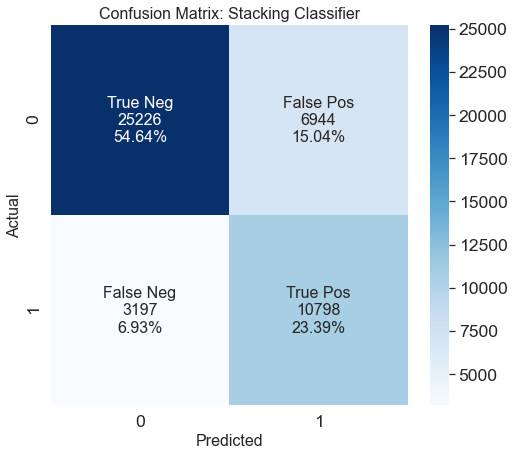

In [15]:
conf_matrix = confusion_matrix(y_test, y_stack_predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(8,7)) 
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix: Stacking Classifier', fontsize = 16); # title with fontsize 20
plt.xlabel('Predicted', fontsize = 16);
plt.ylabel('Actual', fontsize = 16);
plt.savefig('plots/confusion_matrix_Stacking_Classifier.png',dpi=300)

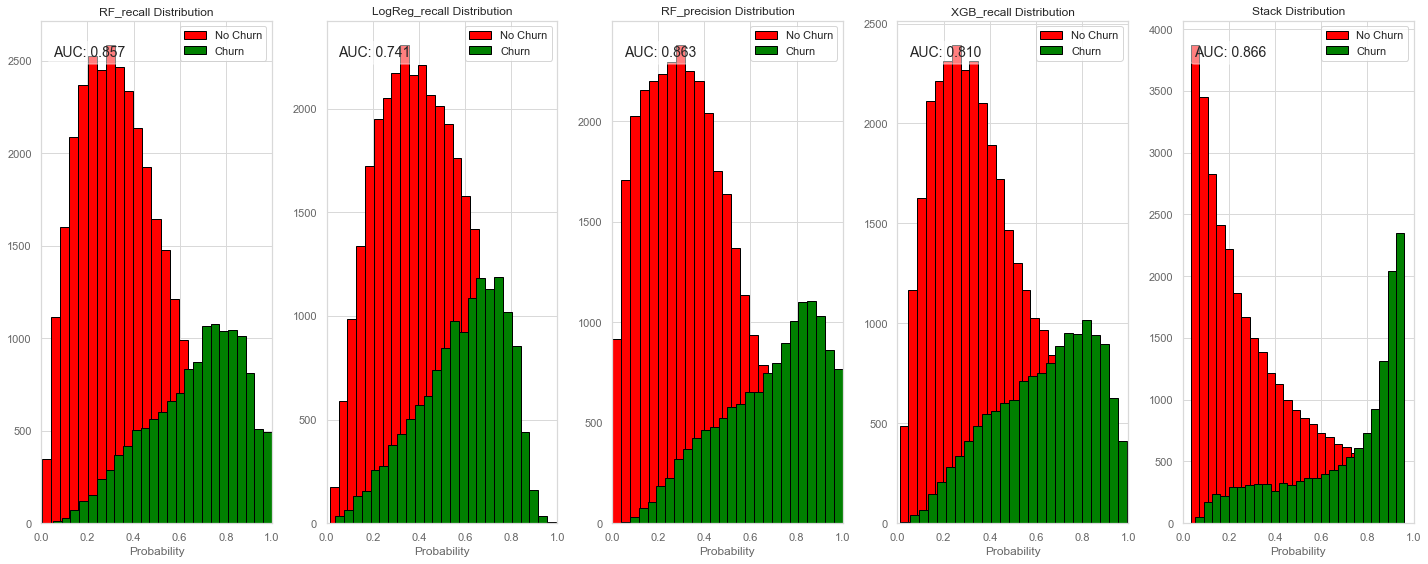

In [16]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red', 
                 hist_kws={'edgecolor':'black', 'alpha': 1.0}, ax = ax[counter],label='No Churn')
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(true_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black', 'alpha': 1.0}, ax = ax[counter],label='Churn')
    
    
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")
    ax[counter].legend()

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("plots/Probability_Distribution_stacking_classifier.png", dpi = 300)

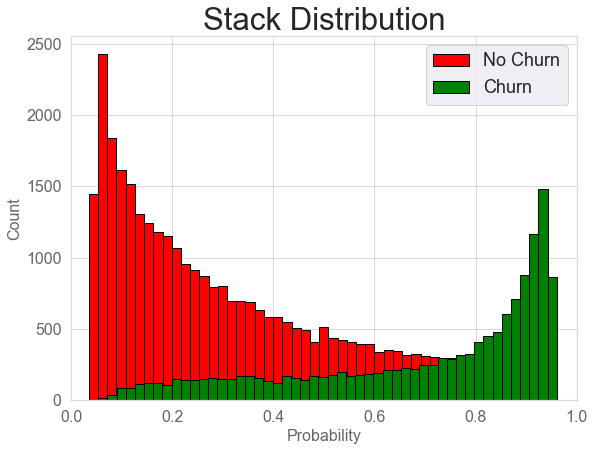

In [53]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(9, 7), nrows=1, ncols = 1)
counter = 0
key = "Stack"

sns.set(font_scale=2.6)

# Get predictions
y_pred = results[key]

# Get AUC
auc = roc_auc_score(y_test, y_pred)
#textstr = f"AUC: {auc:.3f}"

# Plot false distribution
false_pred = results[results["Target"] == 0]
sns.distplot(false_pred[key], hist=True, kde=False, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'black', 'alpha': 1.0}, label='No Churn')

# Plot true distribution
true_pred = results[results["Target"] == 1]
b = sns.distplot(true_pred[key], hist=True, kde=False, 
             bins=int(50), color = 'green',
             hist_kws={'edgecolor':'black', 'alpha': 1.0},label='Churn')

#b.set_yticklabels(b.get_yticks(), size = 16)
#b.set_xticklabels(b.get_xticks(), size = 16)

# These are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#                verticalalignment = "top", bbox=props)

# Set axis limits and labels
ax.set_title(f"{key} Distribution")
ax.set_xlim(0,1)
ax.set_xlabel("Probability",fontsize=16)
ax.set_ylabel("Count",fontsize=16)

ax.set_yticklabels([0,500,1000,1500,2000,2500],fontsize=16)
ax.set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
#ax.set_ylabel("Count",fontsize=16)

ax.legend(fontsize=18)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("plots/Probability_Distribution_stacking_classifier_alone.png", dpi = 300)

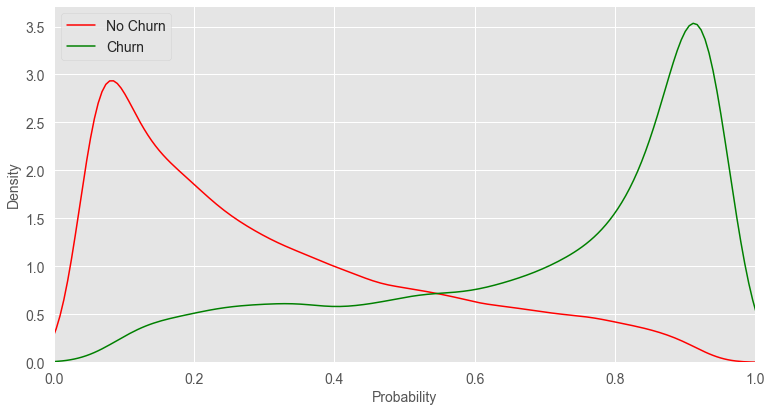

In [65]:
f, ax = plt.subplots(figsize=(11, 6), nrows=1, ncols = 1)
# Get AUC

# Plot false distribution
false_pred = results[results["Target"] == 0]
sns.distplot(false_pred[key], hist=False, kde=True, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'black', 'alpha': 1.0}, label='No Churn')

# Plot true distribution
true_pred = results[results["Target"] == 1]
b = sns.distplot(true_pred[key], hist=False, kde=True, 
             bins=int(50), color = 'green', norm_hist=True,
             hist_kws={'edgecolor':'black', 'alpha': 1.0},label='Churn')


# These are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Set axis limits and labels
ax.set_xlim(0,1)
ax.set_xlabel("Probability")
ax.legend();

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("plots/Probability_Distribution_stacking_classifier_Density_kde.png", dpi = 300)

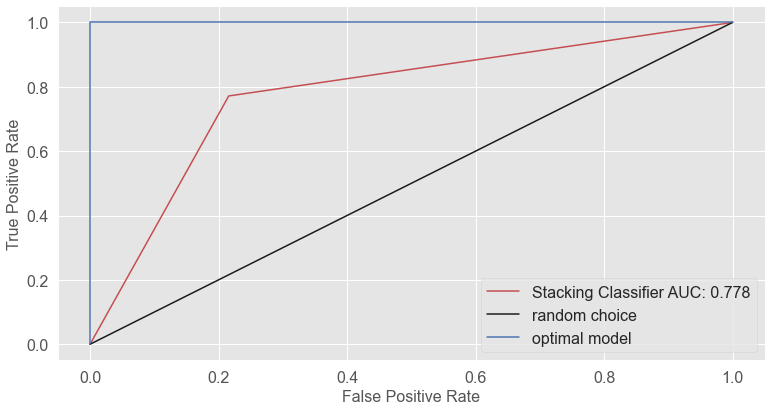

In [70]:
f, ax = plt.subplots(figsize=(11, 6), nrows=1, ncols = 1)
plt.plot(ROC_curve_stack[0],ROC_curve_stack[1],'r-',label = 'Stacking Classifier AUC: %.3f'%float(ROC_AUC_stack))
plt.plot([0,1],[0,1],'k-',label='random choice')
plt.plot([0,0,1,1],[0,1,1,1],'b-',label='optimal model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("plots/Probability_Distribution_stacking_classifier_ROC_AUC.png", dpi = 300)

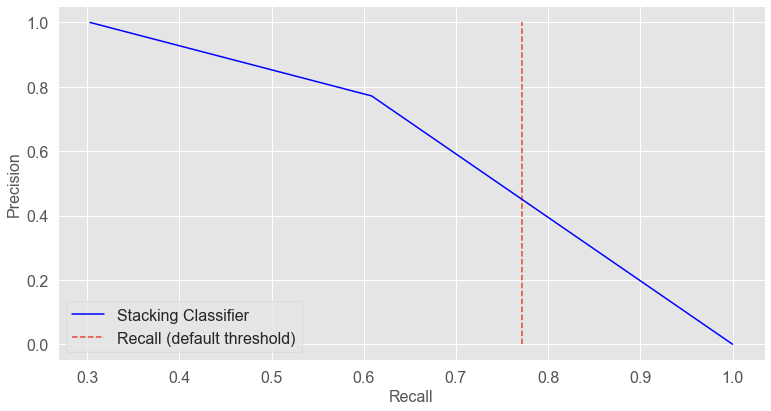

In [82]:
recall_score(y_test, y_stack_predicted)

f, ax = plt.subplots(figsize=(11, 6), nrows=1, ncols = 1)
plt.plot(PR_curve_stack[0], PR_curve_stack[1],'r-',label = 'Stacking Classifier',color='blue')

plt.vlines(recall_score(y_test, y_stack_predicted), 0, 1,linestyles='dashed', label = 'Recall (default threshold)')

plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.ylim(0,1.0)
#plt.xlim(0,1.0)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("plots/Probability_Distribution_stacking_classifier_Precision_Recall_Curve.png", dpi = 300)

In [28]:
results[0:20]

,RF_recall,LogReg_recall,RF_precision,XGB_recall,Stack,Target
0,0.044205,0.100330,0.023066,0.142299,0.049587,0
1,0.318967,0.396255,0.292866,0.474177,0.223835,0
2,0.407955,0.359451,0.392329,0.365540,0.315408,0
3,0.463932,0.614342,0.465186,0.602408,0.535592,1
4,0.716472,0.691803,0.806900,0.516628,0.901595,1
5,0.943754,0.760880,0.956513,0.920559,0.930125,1
6,0.189806,0.230551,0.201772,0.124003,0.163753,0
7,0.303838,0.270779,0.290244,0.304425,0.198031,0
8,0.546698,0.494504,0.548999,0.574517,0.546287,0
9,0.773703,0.791490,0.752279,0.811569,0.819244,1


In [ ]:
# save
filehandler = open("trained_models/stacking_CVC.pckl","wb")
pickle.dump(sclf, filehandler)

## Voting Classifier - Hard Vote 4 Classifier

In [83]:
# recall = 0.770
classifier1 = RandomForestClassifier(n_estimators = 380, criterion = "entropy", max_depth = 35,
                                     max_features = "auto", min_samples_leaf = 1,
                                     min_samples_split = 4, n_jobs = -1, bootstrap = True, random_state = random_state)

# recall = 0.692
classifier2 = LogisticRegression(solver='liblinear',penalty='l2',C=10,n_jobs=-1)


# Precision Optimization
# precision = 0.518
classifier3 = KNeighborsClassifier(n_neighbors = 30,weights='distance',p=1,metric='manhattan',n_jobs=-1)

# precision = 0.609
classifier4 = RandomForestClassifier(n_estimators = 2000, criterion = "entropy", max_depth = None,
                                     max_features = "sqrt", min_samples_leaf = 2,
                                     min_samples_split = 5, n_jobs = -1, bootstrap = False, random_state = random_state)

# recall=  0.728
classifier5 = XGBClassifier(eta = 0.2, gamma = 0, max_depth = 9, min_child_weight = 4, sampling_method='gradient_based', subsample=1,
                            tree_method = 'hist', validate_parameter = True, random_state=random_state, n_jobs=-1)



voting_clf = VotingClassifier(estimators = [('RF_recall',classifier1), ('KNN_precision',classifier3), ('RF_precision',classifier4), ('XGB_recall',classifier5)], voting = 'hard',verbose=True)
voting_clf.fit(X_train,y_train)
y_voting_predicted = voting_clf.predict(X_test)

print('Confusion Matrix Test')
print(confusion_matrix(y_test, y_voting_predicted))

print('Classification Report Test')
print(classification_report(y_test, y_voting_predicted))

print(f"Recall: {recall_score(y_test, y_voting_predicted):.3f}")

print(f"Precision: {precision_score(y_test, y_voting_predicted):.3f}")

print(f"Accuracy: {accuracy_score(y_test, y_voting_predicted):.3f}")

print(f"F1: {f1_score(y_test, y_voting_predicted):.3f}")

[Voting] ................ (1 of 4) Processing RF_recall, total=  19.5s
[Voting] ............ (2 of 4) Processing KNN_precision, total=   7.5s
[Voting] ............. (3 of 4) Processing RF_precision, total= 2.1min
[Voting] ............... (4 of 4) Processing XGB_recall, total=   3.8s
Confusion Matrix Test
[[25570  6600]
 [ 3371 10624]]
Classification Report Test
              precision    recall  f1-score   support

           0       0.88      0.79      0.84     32170
           1       0.62      0.76      0.68     13995

    accuracy                           0.78     46165
   macro avg       0.75      0.78      0.76     46165
weighted avg       0.80      0.78      0.79     46165

Recall: 0.759
Precision: 0.617
Accuracy: 0.784
F1: 0.681


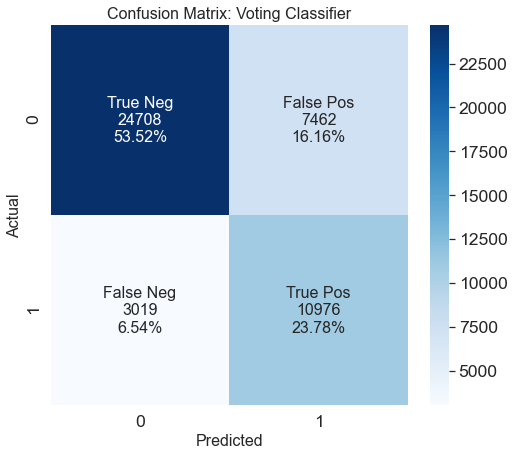

In [92]:
conf_matrix = confusion_matrix(y_test, y_voting_predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(8,7)) 
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix: Voting Classifier', fontsize = 16); # title with fontsize 20
plt.xlabel('Predicted', fontsize = 16);
plt.ylabel('Actual', fontsize = 16);
plt.savefig('plots/confusion_matrix_Voting_Classifier_5classifier_hard.png',dpi=300)

In [33]:
# save
joblib.dump(sclf, "trained_models/votingcf.joblib",compress=3)

['trained_models/votingcf.joblib']

## Voting Classifier - Hard Vote 5 Classifier

In [85]:
# recall = 0.770
classifier1 = RandomForestClassifier(n_estimators = 380, criterion = "entropy", max_depth = 35,
                                     max_features = "auto", min_samples_leaf = 1,
                                     min_samples_split = 4, n_jobs = -1, bootstrap = True, random_state = random_state)

# recall = 0.692
classifier2 = LogisticRegression(solver='liblinear',penalty='l2',C=10,n_jobs=-1)


# Precision Optimization
# precision = 0.518
classifier3 = KNeighborsClassifier(n_neighbors = 30,weights='distance',p=1,metric='manhattan',n_jobs=-1)

# precision = 0.609
classifier4 = RandomForestClassifier(n_estimators = 2000, criterion = "entropy", max_depth = None,
                                     max_features = "sqrt", min_samples_leaf = 2,
                                     min_samples_split = 5, n_jobs = -1, bootstrap = False, random_state = random_state)

# recall=  0.728
classifier5 = XGBClassifier(eta = 0.2, gamma = 0, max_depth = 9, min_child_weight = 4, sampling_method='gradient_based', subsample=1,
                            tree_method = 'hist', validate_parameter = True, random_state=random_state, n_jobs=-1)



voting_clf = VotingClassifier(estimators = [('RF_recall',classifier1), ('LogReg_recall',classifier2), ('KNN_precision',classifier3), ('RF_precision',classifier4), ('XGB_recall',classifier5)], voting = 'hard',verbose=True)
voting_clf.fit(X_train,y_train)
y_voting_predicted = voting_clf.predict(X_test)

print('Confusion Matrix Test')
print(confusion_matrix(y_test, y_voting_predicted))

print('Classification Report Test')
print(classification_report(y_test, y_voting_predicted))

print(f"Recall: {recall_score(y_test, y_voting_predicted):.3f}")

print(f"Precision: {precision_score(y_test, y_voting_predicted):.3f}")

print(f"Accuracy: {accuracy_score(y_test, y_voting_predicted):.3f}")

print(f"F1: {f1_score(y_test, y_voting_predicted):.3f}")

[Voting] ................ (1 of 5) Processing RF_recall, total=  21.6s
[Voting] ............ (2 of 5) Processing LogReg_recall, total=   0.7s
[Voting] ............ (3 of 5) Processing KNN_precision, total=   6.7s
[Voting] ............. (4 of 5) Processing RF_precision, total= 2.1min
[Voting] ............... (5 of 5) Processing XGB_recall, total=   3.1s
Confusion Matrix Test
[[24708  7462]
 [ 3019 10976]]
Classification Report Test
              precision    recall  f1-score   support

           0       0.89      0.77      0.83     32170
           1       0.60      0.78      0.68     13995

    accuracy                           0.77     46165
   macro avg       0.74      0.78      0.75     46165
weighted avg       0.80      0.77      0.78     46165

Recall: 0.784
Precision: 0.595
Accuracy: 0.773
F1: 0.677


Best result for Recall so far!

In [90]:
# save
filehandler = open("trained_models/votingcf_hard.pckl","wb")
pickle.dump(sclf, filehandler)

## Voting Classifier - Soft Vote 5 Classifier

In [96]:
# recall = 0.770
classifier1 = RandomForestClassifier(n_estimators = 380, criterion = "entropy", max_depth = 35,
                                     max_features = "auto", min_samples_leaf = 1,
                                     min_samples_split = 4, n_jobs = -1, bootstrap = True, random_state = random_state)

# recall = 0.692
classifier2 = LogisticRegression(solver='liblinear',penalty='l2',C=10,n_jobs=-1)


# Precision Optimization
# precision = 0.518
classifier3 = KNeighborsClassifier(n_neighbors = 30,weights='distance',p=1,metric='manhattan',n_jobs=-1)

# precision = 0.609
classifier4 = RandomForestClassifier(n_estimators = 2000, criterion = "entropy", max_depth = None,
                                     max_features = "sqrt", min_samples_leaf = 2,
                                     min_samples_split = 5, n_jobs = -1, bootstrap = False, random_state = random_state)

# recall=  0.728
classifier5 = XGBClassifier(eta = 0.2, gamma = 0, max_depth = 9, min_child_weight = 4, sampling_method='gradient_based', subsample=1,
                            tree_method = 'hist', validate_parameter = True, random_state=random_state, n_jobs=-1)



voting_clf_soft = VotingClassifier(estimators = [('RF_recall',classifier1), ('LogReg_recall',classifier2), ('KNN_precision',classifier3), ('RF_precision',classifier4), ('XGB_recall',classifier5)], voting = 'soft',verbose=True)
voting_clf_soft.fit(X_train,y_train)
y_voting_predicted_soft = voting_clf_soft.predict(X_test)
y_voting_predicted_soft_proba = voting_clf_soft.predict_proba(X_test)

print('Confusion Matrix Test')
print(confusion_matrix(y_test, y_voting_predicted_soft))

print('Classification Report Test')
print(classification_report(y_test, y_voting_predicted_soft))

print(f"Recall: {recall_score(y_test, y_voting_predicted_soft):.3f}")
print(f"Precision: {precision_score(y_test, y_voting_predicted_soft):.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_voting_predicted_soft):.3f}")
print(f"F1: {f1_score(y_test, y_voting_predicted_soft):.3f}")

[Voting] ................ (1 of 5) Processing RF_recall, total=  29.3s
[Voting] ............ (2 of 5) Processing LogReg_recall, total=   1.2s
[Voting] ............ (3 of 5) Processing KNN_precision, total=  18.4s
[Voting] ............. (4 of 5) Processing RF_precision, total= 2.8min
[Voting] ............... (5 of 5) Processing XGB_recall, total=  13.6s
Confusion Matrix Test
[[24353  7817]
 [ 2940 11055]]
Classification Report Test
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     32170
           1       0.59      0.79      0.67     13995

    accuracy                           0.77     46165
   macro avg       0.74      0.77      0.75     46165
weighted avg       0.80      0.77      0.77     46165

Recall: 0.790
Precision: 0.586
Accuracy: 0.767
F1: 0.673


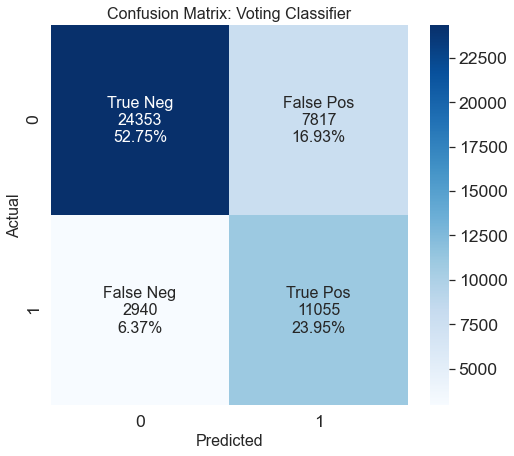

In [97]:
conf_matrix = confusion_matrix(y_test, y_voting_predicted_soft)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(8,7)) 
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 16})
plt.title('Confusion Matrix: Voting Classifier', fontsize = 16); # title with fontsize 20
plt.xlabel('Predicted', fontsize = 16);
plt.ylabel('Actual', fontsize = 16);
plt.savefig('plots/confusion_matrix_Voting_Classifier_5classifier_soft.png',dpi=300)

In [101]:
# write results to dataframe
results_voting_soft = pd.DataFrame()
results_voting_soft["voting"] = y_voting_predicted_soft_proba[:,1]
results_voting_soft["Target"] = y_test.values

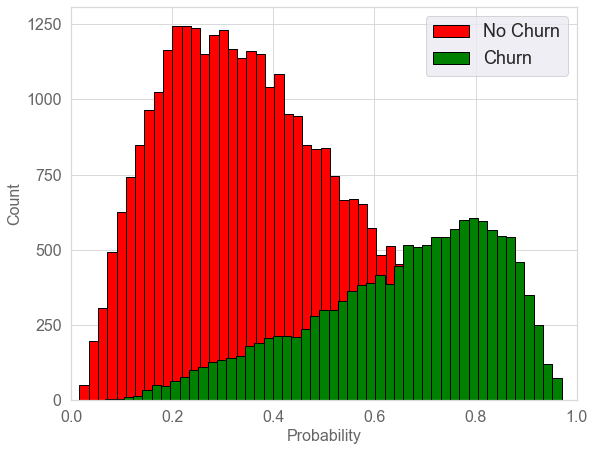

In [106]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(9, 7), nrows=1, ncols = 1)
counter = 0
key = "voting"

sns.set(font_scale=2.6)

# Get predictions
#y_pred = results[key]

# Get AUC
#auc = roc_auc_score(y_test, y_pred)
#textstr = f"AUC: {auc:.3f}"

# Plot false distribution
false_pred = results_voting_soft[results_voting_soft["Target"] == 0]
sns.distplot(false_pred[key], hist=True, kde=False, 
             bins=int(50), color = 'red', 
             hist_kws={'edgecolor':'black', 'alpha': 1.0}, label='No Churn')

# Plot true distribution
true_pred = results_voting_soft[results_voting_soft["Target"] == 1]
b = sns.distplot(true_pred[key], hist=True, kde=False, 
             bins=int(50), color = 'green',
             hist_kws={'edgecolor':'black', 'alpha': 1.0},label='Churn')

#b.set_yticklabels(b.get_yticks(), size = 16)
#b.set_xticklabels(b.get_xticks(), size = 16)

# These are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Place a text box in upper left in axes coords
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#                verticalalignment = "top", bbox=props)

# Set axis limits and labels
#ax.set_title(f"{key} Distribution")
ax.set_xlim(0,1)
ax.set_xlabel("Probability",fontsize=16)
ax.set_ylabel("Count",fontsize=16)

ax.set_yticklabels([0,250,500,750,1000,1250],fontsize=16)
ax.set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
#ax.set_ylabel("Count",fontsize=16)

ax.legend(fontsize=18)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("plots/Probability_Distribution_Voting_Classifiert_soft_alone.png", dpi = 300)

In [107]:
ROC_AUC_voting_soft = roc_auc_score(y_test, y_voting_predicted_soft)
ROC_curve_voting_soft = roc_curve(y_test, y_voting_predicted_soft)
PR_curve_voting_soft = precision_recall_curve(y_test, y_voting_predicted_soft)

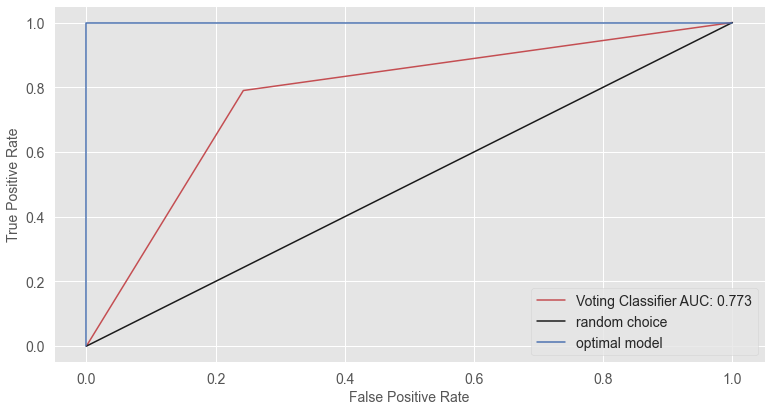

In [110]:
f, ax = plt.subplots(figsize=(11, 6), nrows=1, ncols = 1)
plt.plot(ROC_curve_voting_soft[0],ROC_curve_voting_soft[1],'r-',label = 'Voting Classifier AUC: %.3f'%float(ROC_AUC_voting_soft))
plt.plot([0,1],[0,1],'k-',label='random choice')
plt.plot([0,0,1,1],[0,1,1,1],'b-',label='optimal model')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("plots/Probability_Distribution_voting_classifier_soft_ROC_AUC.png", dpi = 300)

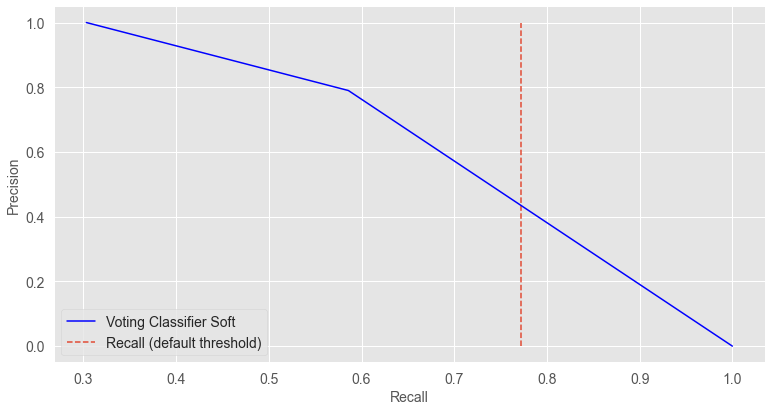

In [111]:
recall_score(y_test, y_voting_predicted_soft)

f, ax = plt.subplots(figsize=(11, 6), nrows=1, ncols = 1)
plt.plot(PR_curve_voting_soft[0], PR_curve_voting_soft[1],'r-',label = 'Voting Classifier Soft',color='blue')

plt.vlines(recall_score(y_test, y_stack_predicted), 0, 1,linestyles='dashed', label = 'Recall (default threshold)')

plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.ylim(0,1.0)
#plt.xlim(0,1.0)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("plots/Probability_Distribution_voting_classifier_soft_Precision_Recall_Curve.png", dpi = 300)

### Influence of the probability threshold on the results

In [121]:
threshold_045 = 0.45
threshold_040 = 0.40

# normal
prediction_0_50 = y_voting_predicted_soft
# 0.45
prediction_0_45 = [0 if x <= threshold_045 else 1 for x in y_voting_predicted_soft_proba[:,1]]
# 0.40
prediction_0_40 = [0 if x <= threshold_040 else 1 for x in y_voting_predicted_soft_proba[:,1]]


conf_matrix_0_50 = confusion_matrix(y_test, prediction_0_50)
conf_matrix_0_45 = confusion_matrix(y_test, prediction_0_45)
conf_matrix_0_40 = confusion_matrix(y_test, prediction_0_40)

In [115]:
def print_cf_threshold(conf_matrix,threshold_name):

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(font_scale=1.6)
    fig, ax = plt.subplots(figsize=(8,7)) 
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 16})
    plt.title('Confusion Matrix: Voting Classifier', fontsize = 16); # title with fontsize 20
    plt.xlabel('Predicted', fontsize = 16);
    plt.ylabel('Actual', fontsize = 16);
    plt.savefig('plots/confusion_matrix_Voting_Classifier_5_classifier_soft_threshold' + threshold_name + '.png',dpi=300)

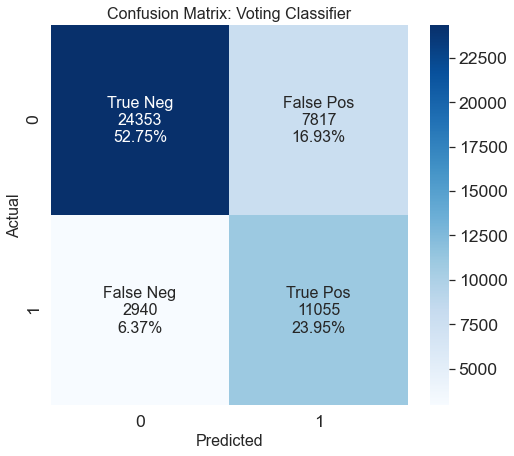

In [116]:
print_cf_threshold(conf_matrix_0_50,'0_50')

In [125]:
print(f"Recall: {recall_score(y_test, prediction_0_50):.3f}")
print(f"Precision: {precision_score(y_test, prediction_0_50):.3f}")
print(f"Accuracy: {accuracy_score(y_test, prediction_0_50):.3f}")
print(f"F1: {f1_score(y_test, prediction_0_50):.3f}")

Recall: 0.790
Precision: 0.586
Accuracy: 0.767
F1: 0.673


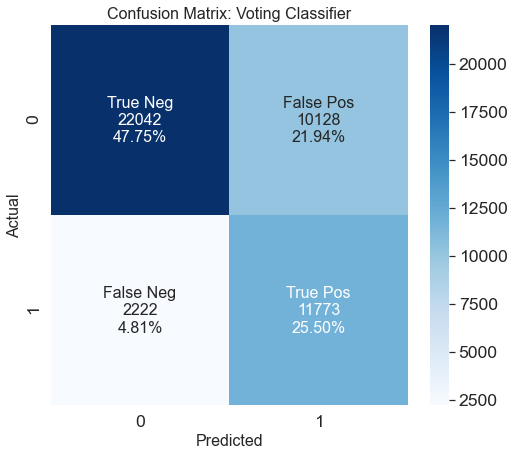

In [117]:
print_cf_threshold(conf_matrix_0_45,'0_45')

In [124]:
print(f"Recall: {recall_score(y_test, prediction_0_45):.3f}")
print(f"Precision: {precision_score(y_test, prediction_0_45):.3f}")
print(f"Accuracy: {accuracy_score(y_test, prediction_0_45):.3f}")
print(f"F1: {f1_score(y_test, prediction_0_45):.3f}")

Recall: 0.841
Precision: 0.538
Accuracy: 0.732
F1: 0.656


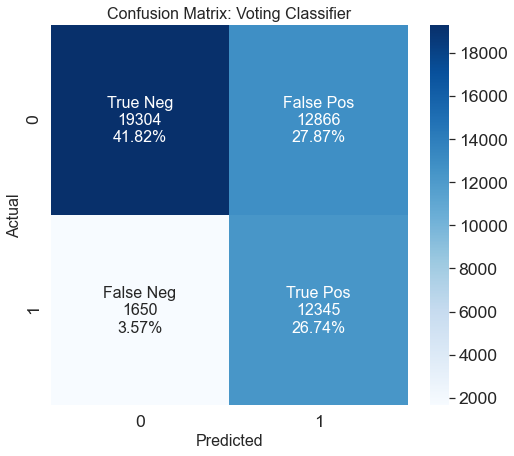

In [122]:
print_cf_threshold(conf_matrix_0_40,'0_40')

In [123]:
print(f"Recall: {recall_score(y_test, prediction_0_40):.3f}")
print(f"Precision: {precision_score(y_test, prediction_0_40):.3f}")
print(f"Accuracy: {accuracy_score(y_test, prediction_0_40):.3f}")
print(f"F1: {f1_score(y_test, prediction_0_40):.3f}")

Recall: 0.882
Precision: 0.490
Accuracy: 0.686
F1: 0.630


In [126]:
# save
filehandler = open("trained_models/votingcf_soft.pckl","wb")
pickle.dump(voting_clf_soft, filehandler)